<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/stochasticprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stochastic Processes**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Modelling & Analyzing (Gaussian) White Noise Processes**

## **Relevance of White Noise**


**A white noise process has following conditions**

* Mean (level) is zero (does not change over time - stationary process)
* Variance is constant (does not change over time - stationary process)
* Zero autocorrelation (values do not correlate with lag values)

**White Noise: Independent & Identically Distributed**

* Hence, in a time series is white noise if the variables are independent and identically distributed (IID) with a mean of zero.

* The term 'white' refers to the way the signal power is distributed (i.e., independently) over time or among frequencies

* **Necessary Condition**: Independence: variables are statistically uncorrelated = their covariance is zero. Therefore, the covariance matrix R of the components of a white noise vector w with n elements must be an n by n diagonal matrix, where each diagonal element Rᵢᵢ is the variance of component wᵢ; and the correlation matrix must be the n by n identity matrix.

* **Sufficient Condition**: every variable in w has a normal distribution with zero mean and the same variance, w is said to be a Gaussian white noise vector. In that case, the joint distribution of w is a multivariate normal distribution; the independence between the variables then implies that the distribution has spherical symmetry in n-dimensional space. Therefore, any orthogonal transformation of the vector will result in a Gaussian white random vector. In particular, under most types of discrete Fourier transform, such as FFT and Hartley, the transform W of w will be a Gaussian white noise vector, too; that is, the n Fourier coefficients of w will be independent Gaussian variables with zero mean and the same variance.

* A random vector (that is, a partially indeterminate process that produces vectors of real numbers) is said to be a white noise vector or white random vector if its components each have a probability distribution with zero mean and finite variance, and are statistically independent: that is, their joint probability distribution must be the product of the distributions of the individual components.

* First moment has to be zero and second moment has to be finite though. (iid ) White noise is always an independent process but reverse may not be true. 

* The technical definition of white noise is that it has equal intensity at all frequencies. This corresponds to a delta function autocorrelation. This is only possible if there is no correlation between any sequential values. So yes, the independence is true both backwards and forwards. Note that the actual distribution is irrelevant.



**Types of White Noise Processes**
* If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise
* There are also white noise processes, like Levy etc.

**Relationship to Stochastic Processes**
* White noise is the generalized mean-square derivative of the Wiener process or Brownian motion (so Wiener is an integrated White Noise)

**White noise is an important concept in time series analysis and forecasting**

* **Predictability**: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
* **Model Diagnostics**: The statistics and diagnostic plots can be uses on time series to check if it is white noise. The series of errors from a time series forecast model should ideally be white noise. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.


## **Create (Gaussian) White Noise**

In [ ]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')
series.head()

,whitenoise
ts,
2010-01-01,1.288185
2010-01-02,1.449446
2010-01-03,0.066336
2010-01-04,-0.764544
2010-01-05,-1.092173


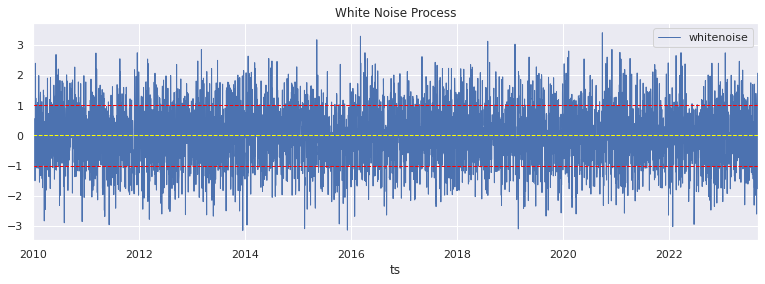

In [ ]:
# Visualize Series
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
series.plot(title='White Noise Process')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0)
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0)
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

## **Distribution**

In [ ]:
series.describe(percentiles=[0.05, 0.95])

,whitenoise
count,5000.000000
mean,-0.000236
std,0.991748
min,-3.149965
5%,-1.663347
50%,-0.006930
95%,1.656811
max,3.400552


Mean is nearly 0.0 and the standard deviation is nearly 1.0. Some variance is expected given the small size of the sample. If we had more data, it might be more interesting to split the series in half and calculate and compare the summary statistics for each half. We would expect to see a similar mean and standard deviation for each sub-series.

In [ ]:
# First central moment: Mean
series.mean()

whitenoise   -0.000236
dtype: float64

In [ ]:
# Second central moment: Variance
series.var()

whitenoise    0.983565
dtype: float64

In [ ]:
# Third central moment: Skewness ('Higher moment')
series.skew()

whitenoise   -0.001609
dtype: float64

In [ ]:
# Forth central moment: Kurtosis ('Higher moment')
series.kurt()

whitenoise   -0.090712
dtype: float64

In [ ]:
# Compute specific percentiles
series.quantile(0.75)

whitenoise    0.667429
Name: 0.75, dtype: float64

**Distribution Plot**

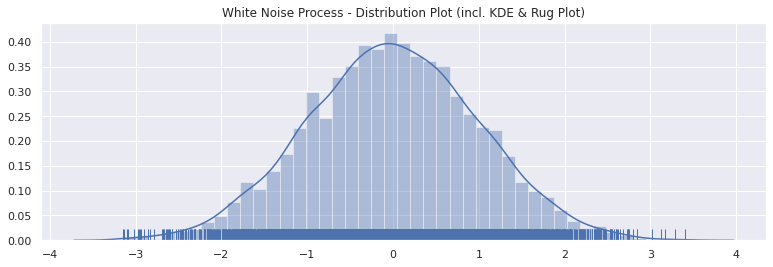

In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

**Boxplot**

Text(0.5, 1.0, 'White Noise Process - Boxplot')

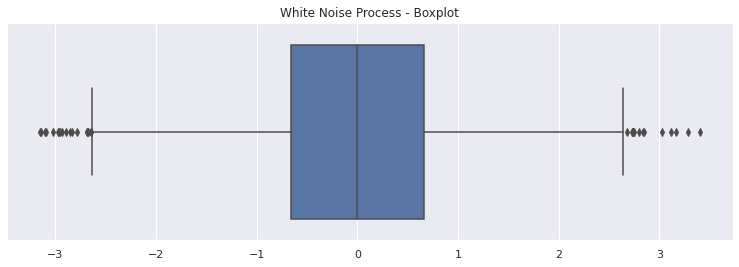

In [ ]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

**QQ Plot**

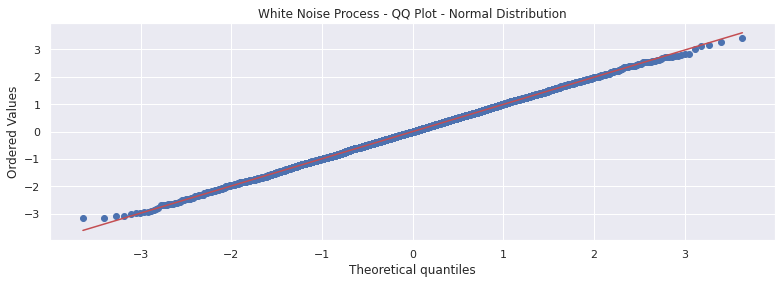

In [ ]:
import scipy
from scipy import stats
stats.probplot(series.whitenoise, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

**Statistical Tests (Goodness of Fit)**

In [ ]:
# Normal Test. H0: sample comes from a normal distribution
import scipy
from scipy import stats
stats.normaltest(series)

NormaltestResult(statistic=array([1.7988695]), pvalue=array([0.40679954]))

In [ ]:
# Shapiro–Wilk Test. H0: data was drawn from a normal distribution
# Determine number of lags based on periods in time series for Ljung-Box test:
# Formula: (Lags = (Number of Observations / 2) -2): "np.int_((periods/2)-2)"
import scipy
from scipy import stats
stats.shapiro(series.whitenoise)

(0.9996960163116455, 0.6947302222251892)

In [ ]:
# Jarque-Bera Test. H0: sample is normal distributed
import scipy
from scipy import stats
stats.jarque_bera(series)

(1.7586207168611774, 0.41506906187895287)

## **Autocorrelation**

**Autocorrelation Plot**

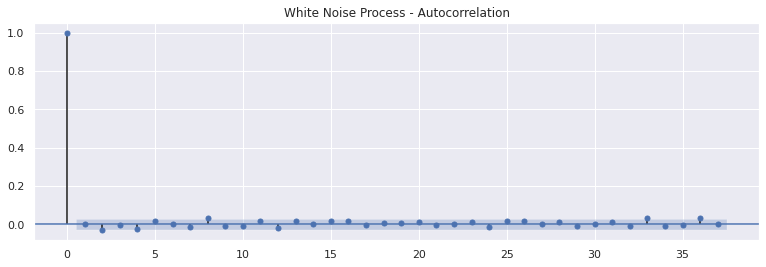

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
plt.title('White Noise Process - Autocorrelation')
plt.show()

**Partial Autocorrelation Lag Plot**

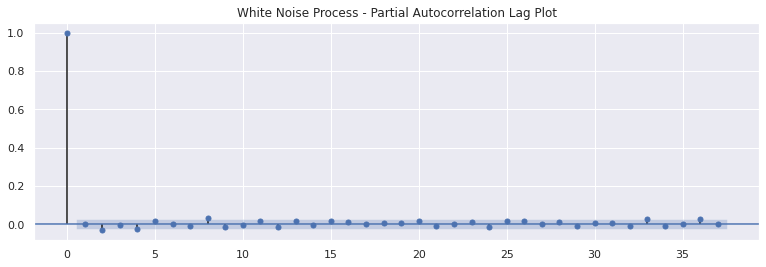

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

**Lag Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


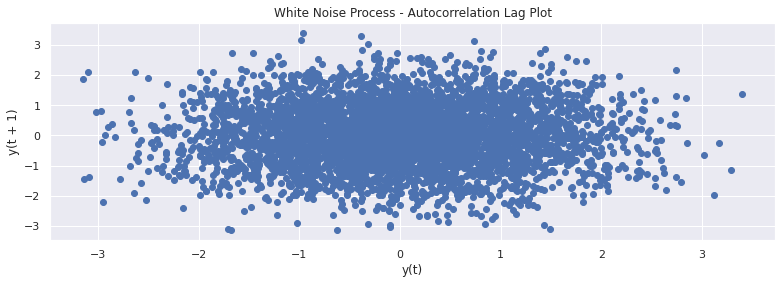

In [ ]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

**Statistical Tests**

In [ ]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(series, axis=0)

array([1.99873153])

In [ ]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series.whitenoise, lags=[(np.int_((periods/2)-2))])

(array([2360.64190127]), array([0.97561779]))

In [ ]:
# BDS Independence Test. H0: Time Series is IID
import statsmodels.api as sm
sm.tsa.stattools.bds(series.whitenoise, max_dim=6, epsilon=None, distance=1.5)

(array([2.20528503, 1.79865181, 1.73497756, 1.50245135, 1.06946712]),
 array([0.0274341 , 0.07207378, 0.08274478, 0.13298058, 0.28485924]))

## **Stationarity**

**Trend & Seasonality Plots**

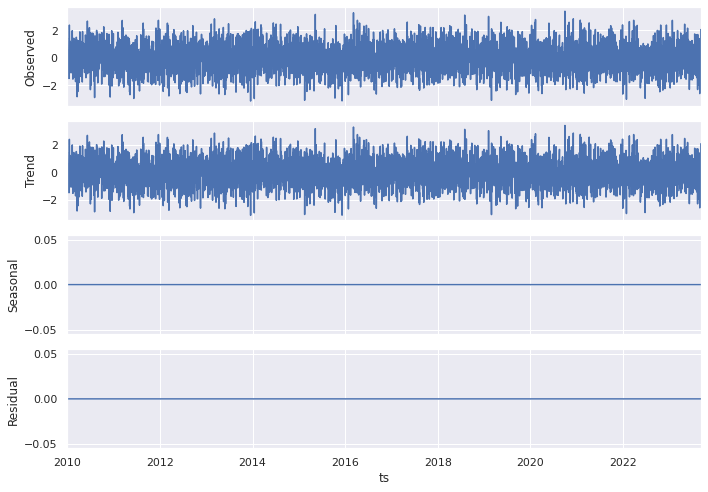

In [ ]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(10, 7)})
decompose = series
result = seasonal_decompose(decompose, model='additive', freq=1) # or multiplicative
result.plot()
plt.show()

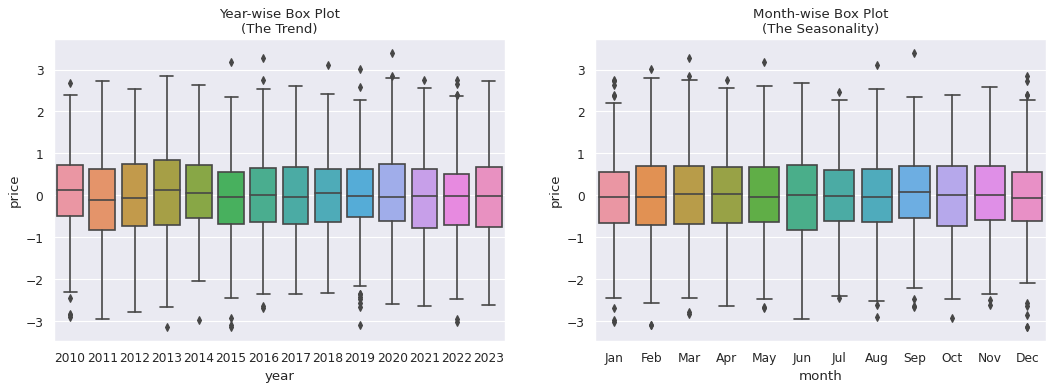

In [ ]:
# Import Data
seasonal_plots = series.copy()

# Transform Series
seasonal_plots.reset_index(inplace=True)
seasonal_plots = seasonal_plots.rename(columns={"ts": "date", "whitenoise" : "price"})

# Prepare Data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16,5), dpi= 80)
sns.boxplot(x='year', y='price', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='price', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)

plt.show()

**Augmented Dickey Fuller Test**

In [ ]:
# Augmented Dickey Fuller. H0: There is a unit root for the series (non stationary)
from statsmodels.tsa.stattools import adfuller
adfuller(series.whitenoise, maxlag=None, regression='ctt', autolag='AIC', store=False, regresults=False)

(-51.655529537354894,
 0.0,
 1,
 4998,
 {'1%': -4.373450004009452,
  '10%': -3.553992425283714,
  '5%': -3.8335721135923864},
 14024.439778510303)

**KPSS - Level & Trend Stationarity Test**

In [ ]:
# KPSS - Level Stationarity Test. H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.kpss(series.whitenoise, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.09474034815631913,
 0.1,
 6,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [ ]:
# KPSS - Trend Stationary Test. H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.kpss(series.whitenoise, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.049288217112185145,
 0.1,
 6,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

# **Martingale**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* In probability theory, a martingale is a sequence of random variables (for example **a stochastic process**) for which, at a particular time, the conditional expectation of the next value in the sequence, given all prior values, is equal to the present value.

* A martingale is characterized by the fact that **it is fair on average**. Martingales arise naturally from the modeling of fair gambling.(In a fair game of chance, **the expected value of each win is zero**)

* The closely related to the martingales are the super martingales, which are stochastic processes with an average loss and submartingales, which are stochastic processes with an average gain.

* The property of being a (sub- / super-) martingale does not belong to stochastic processes alone, but always to a stochastic process **in combination with filtration**. Therefore, the filtration should always be specified.

A **basic definition** of a discrete-time martingale is a discrete-time stochastic process (i.e., a sequence of random variables) X1, X2, X3, ... that satisfies for any time n,


> $\begin{array}{l}
\mathbf{E}\left(\left|X_{n}\right|\right)<\infty \\
\mathbf{E}\left(X_{n+1} \mid X_{1}, \ldots, X_{n}\right)=X_{n}
\end{array}$

That is, the conditional expected value of the next observation, given all the past observations, is equal to the most recent observation.



A **continuous-time martingale** with respect to the stochastic process X<sub>t</sub> is a stochastic process Y<sub>t</sub> such that for all t

> $\begin{array}{l}
\mathbf{E}\left(\left|Y_{t}\right|\right)<\infty \\
\mathbf{E}\left(Y_{t} \mid\left\{X_{\tau}, \tau \leq s\right\}\right)=Y_{s} \quad \forall s \leq t
\end{array}$

This expresses the property that the conditional expectation of an observation at time t, given all the observations up to time s, is equal to the observation at time s (of course, provided that s ≤ t). Note that the second property implies that Yn is measurable with respect to X1 … Xn.

In **full generality**, a stochastic process Y : T × Ω → S taking value in a [Banach space](https://en.m.wikipedia.org/wiki/Banach_space) S is a martingale with respect to a filtration Σ∗ and probability measure P if

**Examples of martingales**

* An unbiased random walk (in any number of dimensions)

* A Wiener process Wt is a martingale, and for a Wiener process the processes W<sub>t</sub><sup>2</sup> - t and the geometric Brownian movement without drift are martingales.

* Stopped Brownian motion, which can be used to model the trajectory of such games

* A gambler's fortune (capital) is a martingale if all the betting games which the gambler plays are fair. To be more specific: suppose Xn is a gambler's fortune after n tosses of a fair coin, where the gambler wins USD 1 if the coin comes up heads and loses USD 1 if it comes up tails. The gambler's conditional expected fortune after the next trial, given the history, is equal to their present fortune. This sequence is thus a martingale.

* If { Nt : t ≥ 0 } is a Poisson process with intensity λ, then the compensated Poisson process { Nt − λt : t ≥ 0 } is a continuous-time martingale with [right-continuous/left-limit](https://en.m.wikipedia.org/wiki/Classification_of_discontinuities) sample paths.

* ([Likelihood-ratio testing](https://en.m.wikipedia.org/wiki/Likelihood-ratio_test) in statistics) A random variable X is thought to be distributed according either to probability density f or to a different probability density g. A random sample X1, ..., Xn is taken. Let Yn be the "likelihood ratio":

> $Y_{n}=\prod_{i=1}^{n} \frac{g\left(X_{i}\right)}{f\left(X_{i}\right)}$

If X is actually distributed according to the density f rather than according to g, then { Yn : n = 1, 2, 3, ... } is a martingale with respect to { Xn : n = 1, 2, 3, ... }.

**Stopped Brownian Motion**

* a stopped process is a stochastic process that is forced to assume the same value after a prescribed (possibly random) time.

https://en.m.wikipedia.org/wiki/Stopped_process#Brownian_motion

## **Martingale Property vs Markov Property**

* In order to formally define the concept of Brownian motion and utilise it as a basis for an asset price model, it is necessary to define the Markov and Martingale properties. These provide an intuition as to how an asset price will behave over time.

* The **Markov property** states that a stochastic process essentially has "no memory". This means that the conditional probability distribution of the future states of the process are independent of any previous state, with the exception of the current state. 

* The **Martingale property** states that the future expectation of a stochastic process is equal to the current value, given all known information about the prior events.

https://www.quantstart.com/articles/The-Markov-and-Martingale-Properties/

## **Simulate Martingale Process**

Toss a coin. toss results (1=lose 0=win). The first step is to find the edges of the losing runs, (steps + edges). You then need to take the difference of the sizes of the steps and shove those values back into the original data. When you take a cumsum of toss2 it gives you the current length of your losing streak. Your bet is then 2 ** cumsum(toss2).

In [ ]:
toss = np.random.randint(0,2,100)

toss = pd.Series(toss)

steps = (toss.cumsum() * toss).diff() # mask out the cumsum where we won [0 1 2 3 0 0 4 5 6 ... ]
edges = steps < 0 # find where the cumsum steps down -> where we won
dsteps = steps[edges].diff() # find the length of each losing streak
dsteps[steps[edges].index[0]] = steps[edges][:1] # fix length of the first run which in now NaN
toss2 = toss.copy() # get a copy of the toss series
toss2[edges] = dsteps # insert the length of the losing streaks into the copy of the toss results
bets = 2 ** (toss2).cumsum() # compute the wagers

res = pd.DataFrame({'toss': toss,
                    'toss2': toss2,
                    'runs': toss2.cumsum(),
                    'next_bet': bets})

res

,toss,toss2,runs,next_bet
0,0,0,0,1
1,0,0,0,1
2,1,1,1,2
3,0,-1,0,1
4,1,1,1,2
...,...,...,...,...
95,0,-1,0,1
96,0,0,0,1
97,1,1,1,2
98,0,-1,0,1


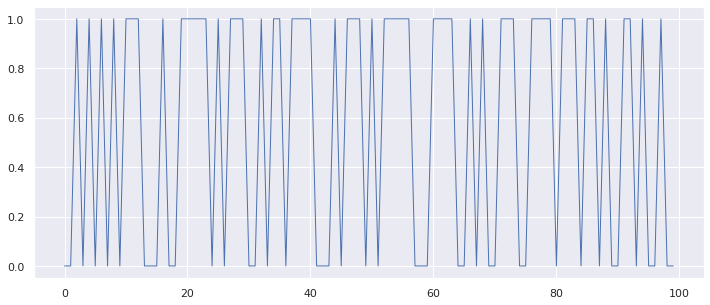

In [ ]:
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
plt.plot(res.toss)

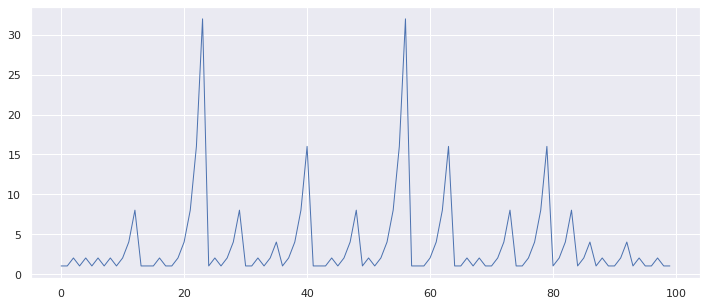

In [ ]:
# Your bet
plt.plot(res.next_bet)

# **Random Walk (with Drift)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Characteristics & Relevance of Random Walks**

* Random walk is another time series model where the current observation is equal to the previous observation with a random step up or down. Known as a stochastic or random process.

> y<sub>(t)</sub> = B<sub>0</sub> + B<sub>1</sub> * X<sub>(t-1)</sub> + e<sub>(t)</sub>

* A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence. 

* The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. It is this dependency that gives the process its name as a “random walk” or a “drunkard’s walk”.


* A simple random walk is a martingale
* In higher dimensions, the set of randomly walked points has interesting geometric properties. In fact, one gets a discrete fractal, that is, a set which exhibits stochastic self-similarity on large scales.
* Examples include the path traced by a molecule as it travels in a liquid or a gas, the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality
* Random walks serve as a fundamental model for the recorded stochastic activity / stochastic processes.
* As a more mathematical application, the value of π can be approximated by the use of random walk in an agent-based modeling environment.

* There are many types of time-dependent processes referred to as random walks - most often refers to a special category of Markov chains or Markov processes. A random walk on the integers (and the gambler's ruin problem) are examples of **Markov processes in discrete time**.

* Specific cases or limits of random walks include the Lévy flight and diffusion models such as Brownian motion. **A Wiener process (~ Brownian motion) is the integral of a white noise generalized Gaussian process**. It is not stationary, but it has stationary increments. A Wiener process is the scaling limit of random walk in dimension 1.

* Random walks can take place on a variety of spaces: graphs, on the integers or real line, in the plane or higher-dimensional vector spaces, on curved surfaces or higher-dimensional Riemannian manifolds, and also on groups finite, finitely generated or Lie.

**Random Walk and Autocorrelation**

* We can calculate the correlation between each observation and the observations at previous time steps. Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.

**Stationarity**

* A stationary time series is one where the values are not a function of time. Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time.
* The current observation is a random step from the previous observation. Therefore we can expect a random walk to be non-stationary. In fact, all random walk processes are non-stationary. Note that not all non-stationary time series are random walks.
* Additionally, a non-stationary time series does not have a consistent mean and/or variance over time. A review of the random walk line plot might suggest this to be the case. We can confirm this using a statistical significance test, specifically the Augmented Dickey-Fuller test.

**IID**

* This model assumes that in each period the variable takes a random step away from its previous value, and the steps are independently and identically distributed in size (“i.i.d.”). 

* This is equivalent to saying that the first difference of the variable is a series to which the mean model should be applied. So, if you begin with a time series that wanders all over the map, but you find that its first difference looks like it is an i.i.d. sequence, then a random walk model is a potentially good candidate.

**Prediction**

* A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply because we know that the next time step will be a function of the prior time step. 
* This is often called the naive forecast, or a persistence model. We can implement this in Python by first splitting the dataset into train and test sets, then using the persistence model to predict the outcome using a rolling forecast method. Once all predictions are collected for the test set, the mean squared error is calculated.

**Drift**

* A random walk model is said to have “drift” or “no drift” according to whether the distribution of step sizes has a non-zero mean or a zero mean. At period n, the k-step-ahead forecast that the random walk model without drift gives for the variable Y is

> $\hat{Y}_{n+k}=Y_{n}$

* In others words, it predicts that all future values will equal the last observed value. This doesn’t really mean you expect them to all be the same, but just that you think they are equally likely to be higher or lower, and you are staying on the fence as far as point predictions are concerned. If you extrapolate forecasts from the random walk model into the distant future, they will go off on a horizontal line, just like the forecasts of the mean model. So, qualitatively the long-term point forecasts of the random walk model look similar to those of the mean model, except that they are always “re-anchored” on the last observed value rather than the mean.of the historical data.

* For the random-walk-with-drift model, the k-step-ahead forecast from period n is:

> $\hat{\mathrm{Y}}_{\mathrm{n}+\mathrm{k}}=\mathrm{Y}_{\mathrm{n}}+\mathrm{k} \hat{\mathrm{d}}$

* where dˆ is the estimated drift, i.e., the average increase from one period to the next. So, the long-term forecasts from the random-walk-with-drift model look like a trend line with slope dˆ , but it is always re-anchored on the last observed value. 

## **Financial Time Series**

**Is time series a random walk?**

* Your time series may be a random walk. Some ways to check if your time series is a random walk are as follows:
The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
* The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
The persistence model provides the best source of reliable predictions.
* This last point is key for time series forecasting. Baseline forecasts with the persistence model quickly flesh out whether you can do significantly better. If you can’t, you’re probably working with a random walk. Many time series are random walks, particularly those of security prices over time. The random walk hypothesis is a theory that stock market prices are a random walk and cannot be predicted.
* "A random walk is one in which future steps or directions cannot be predicted on the basis of past history. When the term is applied to the stock market, it means that short-run changes in stock prices are unpredictable." - Page 26, A Random Walk down Wall Street: The Time-tested Strategy for Successful Investing. https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

**Applications of Random Walks**

* In computer networks, random walks can model the number of transmission packets buffered at a server.
* In population genetics, random walk describes the statistical properties of genetic drift.
* In image segmentation, random walks are used to determine the labels (i.e., “object” or “background”) to associate with each pixel.
* In brain research, random walks and reinforced random walks are used to model cascades of neuron firing in the brain.
Random walks have also been used to sample massive online graphs such as online social networks.

## **Simulating a 1D Random Walk**

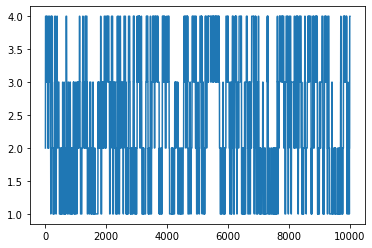

In [ ]:
# Python code for 1-D random walk. 
import random
  
# Probability to move up or down 
prob = [0.05, 0.95]   
  
# statically defining the starting position 
start = 2  
positions = [start] 
  
# creating the random points 
rr = np.random.random(10000) 
downp = rr < prob[0] 
upp = rr > prob[1] 
  
  
for idownp, iupp in zip(downp, upp): 
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up) 
  
# plotting down the graph of the random walk in 1D 
plt.plot(positions) 
plt.show() 

## **Simulating a 2D Random Walk**

**Higher Dimensions**

* In higher dimensions, the set of randomly walked points has interesting geometric properties. In fact, one gets a discrete fractal, that is, a set which exhibits stochastic self-similarity on large scales. 
* On small scales, one can observe “jaggedness” resulting from the grid on which the walk is performed. Two books of Lawler referenced below are a good source on this topic. The trajectory of a random walk is the collection of points visited, considered as a set with disregard to when the walk arrived at the point. In one dimension, the trajectory is simply all points between the minimum height and the maximum height the walk achieved (both are, on average, on the order of ?n).

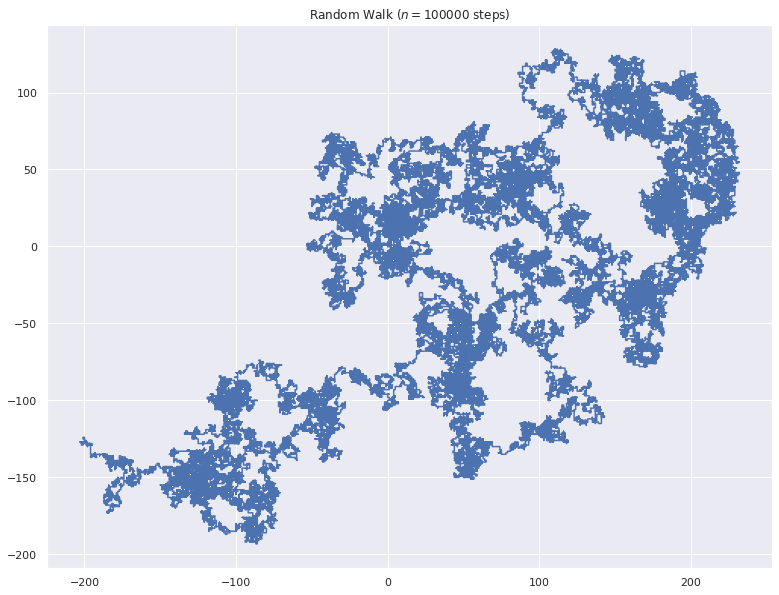

In [ ]:
# Python code for 2D random walk. 
import pylab 
import random 
  
# defining the number of steps 
n = 100000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = np.zeros(n) 
y = np.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1

sns.set(rc={'figure.figsize':(13, 10)})
pylab.title("Random Walk ($n = " + str(n) + "$ steps)") 
pylab.plot(x, y) 

## **Simulating a 3D Random Walk**

Text(0.5, 0.92, '3D Random Walk')

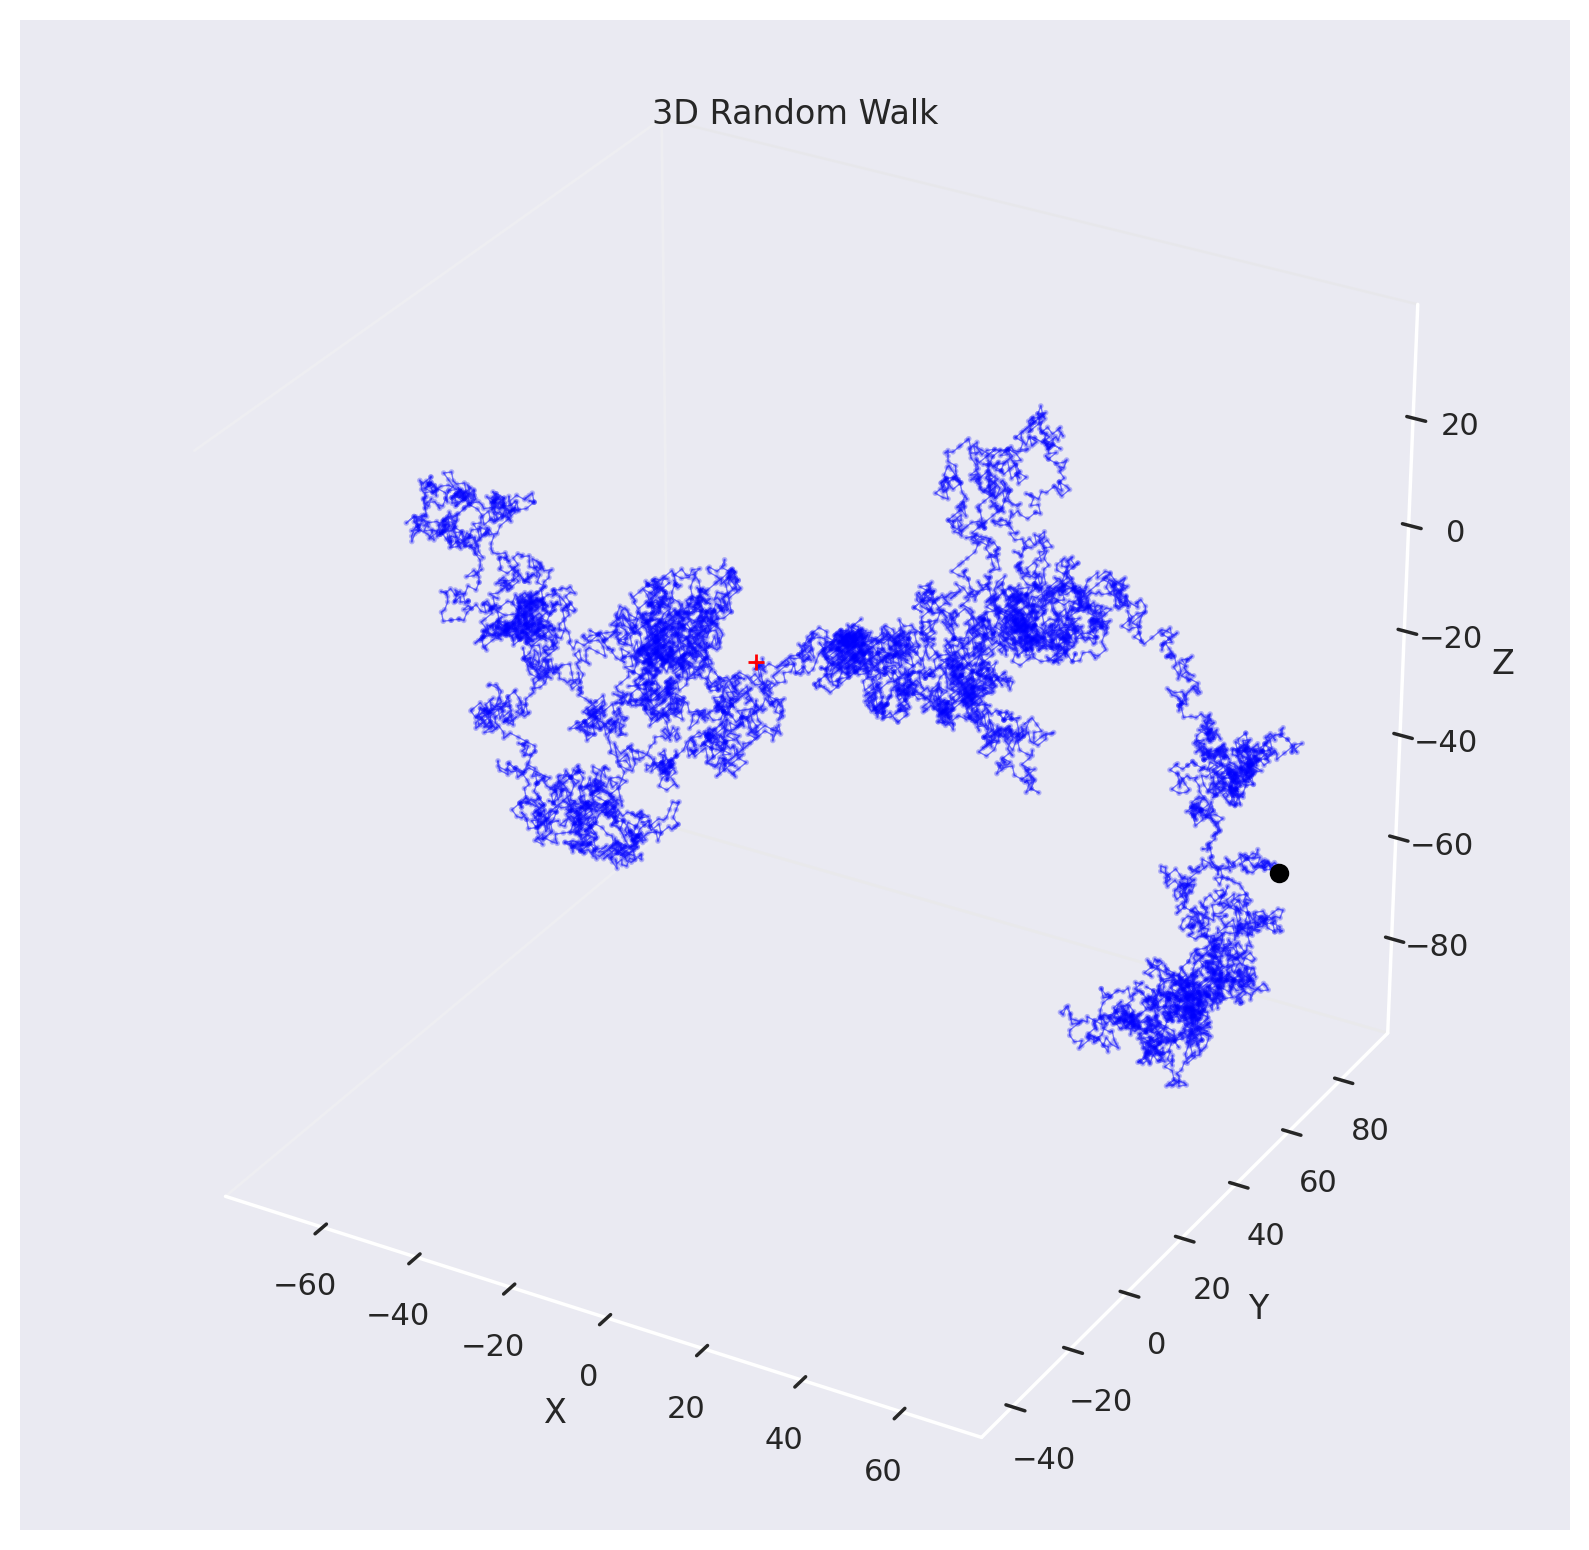

In [ ]:
from mpl_toolkits import mplot3d

# Define parameters for the walk
dims = 3
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 3D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(path[:,0], path[:,1], path[:,2], 
             c='blue', alpha=0.25,s=1)
ax.plot3D(path[:,0], path[:,1], path[:,2], 
          c='blue', alpha=0.5, lw=0.5)
ax.plot3D(start[:,0], start[:,1], start[:,2], 
          c='red', marker='+')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
          c='black', marker='o')
plt.title('3D Random Walk')
#plt.savefig('plots/random_walk_3d.png’,dpi=250);

https://towardsdatascience.com/random-walks-with-python-8420981bc4bc

# **Wiener Process & Brownian Motion**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Characterisations of a Wiener Process**

**The Wiener process is a real valued continuous-time (continuous state-space) stochastic process**

* W<sub>0</sub> = 0 (P-almost certain)
* The Wiener process has (stochastically) independent increments.
* The increases are therefore stationary and normally distributed with the expected value zero and the variance t - s.
* The individual paths are (P-) almost certainly continuous.

**Properties of a Wiener Process**

1. The Wiener process belongs to the family of **Markov processes** and there specifically to the class of **Levy processes**. It also fulfills the strong markov property. It is one of the best known Lévy processes (**càdlàg** stochastic processes with stationary independent increments).
2. The Wiener Process is a **special Gaussian process** with an expected value function E(W<sub>t</sub>)  = 0 and and the covariance function Cov (W<sub>s</sub>, W<sub>t</sub>) = min (s,t)
3. The Wiener process is a (continuous time) **martingale** (Lévy characterisation: the Wiener process is an almost surely continuous martingale with W0 = 0 and quadratic variation [Wt, Wt] = t, which means that Wt2 − t is also a martingale).
4. The Wiener process is a **Levy process** with steady paths and constant expectation 0.

*Another characterisation is that the Wiener process has a spectral representation as a sine series whose coefficients are independent N(0, 1) random variables. This representation can be obtained using the Karhunen–Loève theorem.*

**Applications**

* In physics it is used to study Brownian motion, the diffusion of minute particles suspended in fluid, and other types of diffusion via the Fokker–Planck and Langevin equations. 
* It also forms the basis for the rigorous path integral formulation of quantum mechanics (by the Feynman–Kac formula, a solution to the Schrödinger equation can be represented in terms of the Wiener process) and the study of eternal inflation in physical cosmology. 
* It is also prominent in the mathematical theory of finance, in particular the Black–Scholes option pricing model.

## **Relation to other Stochastic Processes**

**Wiener process as a limit of random walk**

* A Wiener process (~ Brownian motion) is the **integral of a white noise generalized Gaussian process**. It is not stationary, but it has stationary increments.

* Let X<sub>1</sub>, X<sub>2</sub>, X<sub>n</sub> be a sequence of independent and identically distributed (i.i.d.) random variables with mean 0 and variance 1.  The central limit theorem asserts that W<sup>(n)</sup> (1) converges in distribution to a standard Gaussian random variable W(1) as n → ∞. 

* [Donsker's theorem](https://en.m.wikipedia.org/wiki/Donsker%27s_theorem) asserts that as n → ∞ , W<sub>n</sub> approaches a Wiener process, which explains the ubiquity of Brownian motion. **Donsker's invariance principle** states that: As random variables taking values in the Skorokhod space D [0,1], the random function W<sup>(n)</sup> converges in distribution to a standard Brownian motion W := (W(t))<sub>t ∈ [0,1]</sub> as n → ∞.

![Donsker's Invariance Principle](https://upload.wikimedia.org/wikipedia/commons/8/8c/Donskers_invariance_principle.gif)

*Donsker's invariance principle for simple random walk on Z*

**Differences between Wiener Process & Random Walk**

<img src="https://raw.githubusercontent.com/deltorobarba/machinelearning/master/wiener.jpg" alt="wiener">

https://www.quora.com/What-is-an-intuitive-explanation-of-a-Wiener-process?top_ans=3955819

* Random walks are discrete. (In a standard random walk, you move ±1 every unit of time). Consider a generalization, where you move ± √h every ℎ units of time. The limit as ℎ→0 of this process is the Wiener process.

* The simplest example of random walk is the homogeneous one on Z. At each time you have a probability to go from n to n-1 and from n to n+1. Brownian motion are processes defined for each t in R^+ and take values in R.

* **A Wiener process is the [scaling limit](https://en.m.wikipedia.org/wiki/Scaling_limit) of random walk in dimension 1**. This means that if you take a random walk with very small steps, you get an approximation to a Wiener process (and, less accurately, to Brownian motion). To be more precise, if the step size is ε, one needs to take a walk of length L/ε2 to approximate a Wiener length of L. As the step size tends to 0 (and the number of steps increases proportionally), **random walk converges to a Wiener process** in an appropriate sense. Formally, if B is the space of all paths of length L with the maximum topology, and if M is the space of measure over B with the norm topology, then the convergence is in the space M. Similarly, a Wiener process in several dimensions is the scaling limit of random walk in the same number of dimensions. The **convergence of a random walk toward the Wiener process is controlled by the central limit theorem**, and by **Donsker's theorem**. For a particle in a known fixed position at t = 0, the central limit theorem tells us that after a large number of independent steps in the random walk, the walker's position is distributed according to a normal distribution of total variance. The **Green's function** of the diffusion equation that controls the Wiener process, suggests that, **after a large number of steps, the random walk converges toward a Wiener process**.


* A random walk is a discrete fractal (a function with integer dimensions; 1, 2, ...), but a **Wiener process trajectory is a true fractal**, and there is a connection between the two (a Wiener process walk is a fractal of **Hausdorff dimension** 2). 

* Like the random walk, the Wiener process is **recurrent in one or two dimensions** (meaning that it returns almost surely to any fixed neighborhood of the origin infinitely often) whereas it is not recurrent in dimensions three and highe r. 


* Unlike the random walk, a **Wiener Process is scale invariant**. A Wiener process enjoys many symmetries random walk does not. For example, a **Wiener process walk is invariant to rotations, but the random walk is not**, since the underlying grid is not (random walk is invariant to rotations by 90 degrees, but Wiener processes are invariant to rotations by, for example, 17 degrees too). This means that in many cases, problems on a random walk are easier to solve by translating them to a Wiener process, solving the problem there, and then translating back. 

* Random walk and Wiener process can be coupled, namely manifested on the **same probability space in a dependent way that forces them to be quite close**. The simplest such coupling is the Skorokhod embedding, but there exist more precise couplings, such as Komlós–Major–Tusnády approximation theorem. The Wiener measure is the probability law on the space of continuous functions g, with g(0) = 0, induced by the Wiener process. An integral based on Wiener measure may be called a Wiener integral.



**(Gaussian) White Noise**

* The Wiener process is used to represent the integral (from time zero to time t) of a zero mean, unit variance, delta correlated **<u>Gaussian</u> white noise process**

**Brownian Motion**

* **"Brownian motion" is a phenomenon that can be modeled with a Wiener Process**, because a Wiener process is a stochastic process with similar behavior to Brownian motion, the physical phenomenon of a minute particle diffusing in a fluid.

* The Brownian motion process (and the Poisson process in one dimension) are both examples of **Markov processes in continuous time**

* Itō also paved the way for the Wiener process from physics to other sciences: the **stochastic differential equations** he set up made it possible to adapt the Brownian motion to more statistical problems. 

* The **geometric Brownian motion** derived from a stochastic differential equation solves the problem that the **Wiener process, regardless of its starting value, almost certainly reaches negative values over time, which is impossible for stocks**. Since the development of the famous **Black-Scholes model**, the geometric Brownian movement has been the standard.

**Ornstein-Uhlenbeck-Process**

* The problem raised by the **[non-rectifiable paths](https://en.m.wikipedia.org/wiki/Arc_length)** of the Wiener process in the modeling of Brownian paths leads to the Ornstein-Uhlenbeck process and also makes the need for a theory of stochastic integration and differentiation clear
* here it is not the motion but the speed of the particle as one that is not rectifiable process derived from the Wiener process, from which one obtains rectifiable particle paths through integration.

## **Simulating a Wiener Process**

Each path is an independent Wiener process ([Source](https://www.quantconnect.com/tutorials/introduction-to-options/stochastic-processes-and-monte-carlo-method))

Populating the interactive namespace from numpy and matplotlib


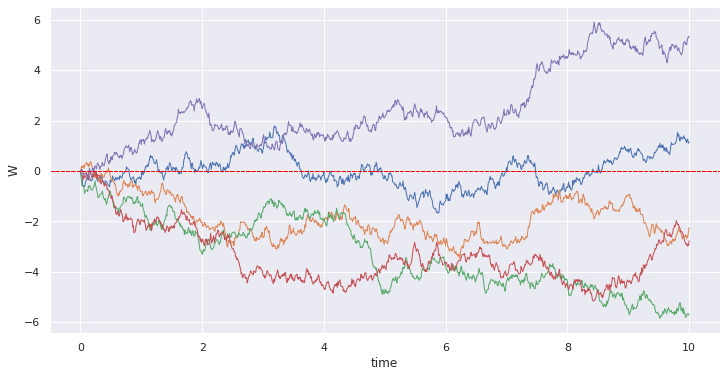

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 10), "lines.linewidth": 1.0})
%pylab inline
def wiener_process(T, N):
    """
    T: total time
    N: The total number of steps
    """
    W0 = [0]
    dt = T/float(N)
    # simulate the increments by normal random variable generator
    increments = np.random.normal(0, 1*np.sqrt(dt), N)
    W = W0 + list(np.cumsum(increments))
    return W

N = 1000
T = 10
dt = T / float(N)
t = np.linspace(0.0, N*dt, N+1)
plt.figure(figsize=(12,6))
for i in range(5):
    W = wiener_process(T, N)
    plt.plot(t, W)
    plt.xlabel('time')
    plt.ylabel('W')
    plt.grid(True)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)

## **Simulating Random Walk (with Drift) based on Geometric Brownian Motion**

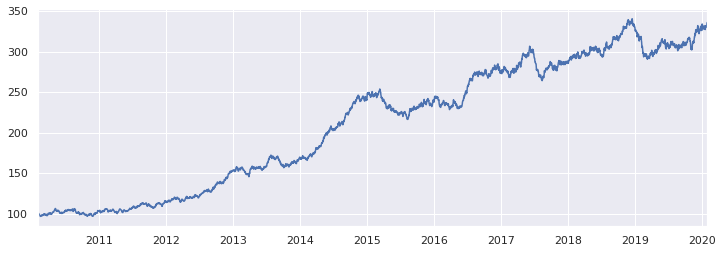

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})

def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20): 
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2010-02-01', '2020-01-29')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
randomwalk = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

randomwalk.plot()

In [ ]:
randomwalk.head()

2010-02-01    100.287793
2010-02-02    100.654383
2010-02-03    100.753001
2010-02-04    101.278419
2010-02-05    100.900376
Freq: D, dtype: float64

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
randomwalk.to_csv('randomwalk.csv')
!cp randomwalk.csv "drive/My Drive/"

# **Brownian Bridge**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Overview**

* A Brownian bridge is a **continuous Gaussian process** with X<sub>0</sub> = X<sub>1</sub> = 0, and with mean and covariance functions given in (c) and (d), respectively.

* The Brownian bridge is (like the Ornstein–Uhlenbeck process) an example of a Gaussian process **whose increments are not independent**.

* There are several ways of constructing a Brownian bridge from a standard Brownian motion [Source](https://www.randomservices.org/random/brown/Bridge.html)

**Brownian Bridge benefits in two ways in financial engineering:**

* BB could reduce the simulation paths, this reduces computation effort, especially when the underlying factors are a lot (say 20-30). I noticed that Papageorgiou1 has a paper "The Brownian Bridge Does Not Offer a Consistent Advantage in Quasi-Monte Carlo Integration" (2002). 
* BB could reduce the computation effort on path-dependent derivatives. For example, during pricing of a barrier option, a path could be simulated with monthly scenarios of the factors; then BB could be used to estimate the probability of the path "knock-out" of the barrier.

**Applications: Path Simulation for Stock Shares**

* The simple Monte Carlo method with Euler method supplemented by the Brownian bridge correction for the possibility of falling below or exceeding the barriers between discretization times. 

* By merely discreetly viewing (simulating) the (log) share price, those paths can also lead to a positive final payment in which the share price between the selected times k delta t has exceeded the lower barrier or exceeded the upper barrier without this is noticed in the discretized model. 

* To calculate the probability of such an unnoticed barrier violation, Brownian Bridge is used (with the help of the independence and stationarity of its growth).

* With the help of the statements about the Brown Bridge, one can formally. Specify the Monte Carlo algorithm that can be used to evaluate double barrier options without having to discretize the price path.

**Geometrische Brownsche Bewegung**

https://de.m.wikipedia.org/wiki/Geometrische_brownsche_Bewegung

**Application: Bond Prices**

* Computation of bond prices in a structural default model with jumps with an unbiased Monte-Carlo simulation. 

* The algorithm requires the evaluation of integrals with the density of the first-passage time of a Brownian bridge as the integrand. (Metwally and Atiya (2002) suggest an approximation of these integrals.)

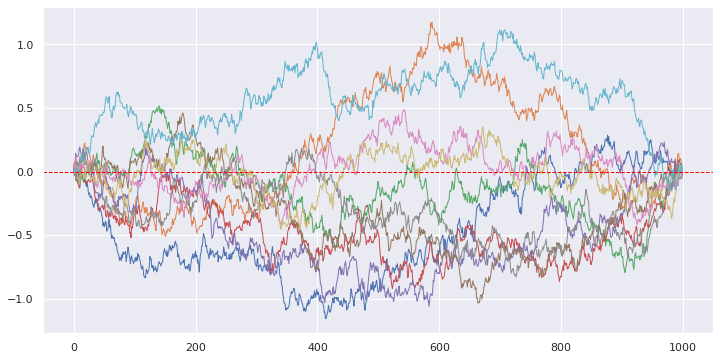

In [ ]:
import six

seed = 0
N = 1000
M = 10

np.random.seed(seed)

def sample_path_batch(M, N):
    dt = 1.0 / (N -1)
    dt_sqrt = np.sqrt(dt)
    B = np.empty((M, N), dtype=np.float32)
    B[:, 0] = 0
    for n in six.moves.range(N - 2):
         t = n * dt
         xi = np.random.randn(M) * dt_sqrt
         B[:, n + 1] = B[:, n] * (1 - dt / (1 - t)) + xi
    B[:, -1] = 0   # Set last B to zero
    return B

sns.set(rc={'figure.figsize':(12, 6), "lines.linewidth": 1.0})
B = sample_path_batch(M, N)
plt.plot(B.T)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.show()

# **Gaussian Process**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Characterisations of a Gaussian Process**

* A Gaussian process is a stochastic process (a collection of random variables indexed by time or space), such that every finite collection of those random variables has a multivariate normal distribution, i.e. **every finite linear combination of them is normally distributed**. 

* The distribution of a Gaussian process is the joint distribution of all those (infinitely many) random variables, and as such, it is a distribution over functions with a continuous domain, e.g. time or space.

* Gaussian Processes are a class of stationary, zero-mean stochastic processes which are completely dependent on their autocovariance functions. This class of models can be used for both regression and classification tasks.

* Gaussian Processes provide estimates about uncertainty, for example giving an estimate of how sure an algorithm is that an item belongs to a class or not.

* In order to deal with situations which embed a certain degree of uncertainty is typically made use of probability distributions.

* Gaussian processes can allow us to describe probability distributions of which we can later update the distribution using Bayes Rule once we gather new training data.



## **Relation to other Stochastic Processes**

* A **Wiener process (~ Brownian motion)** is the integral of a white noise generalized Gaussian process. It is not stationary, but it has stationary increments. 

* The **fractional Brownian motion** is a Gaussian process whose covariance function is a generalisation of that of the Wiener process.

* The **Ornstein–Uhlenbeck** process is a stationary Gaussian process.

* The **Brownian bridge** is (like the Ornstein–Uhlenbeck process) an example of a Gaussian process whose increments are not independent.

## **Gaussian Processes for Machine Learning**

http://katbailey.github.io/post/gaussian-processes-for-dummies/

**Introduction**

* Bayesian linear regression provides a probabilistic approach to this by finding a distribution over the parameters that gets updated whenever new data points are observed. The GP approach, in contrast, is a non-parametric approach, in that it finds a distribution over the possible functions f(x) that are consistent with the observed data.

* As with all Bayesian methods it begins with a prior distribution and updates this as data points are observed, producing the posterior distribution over functions.

**Covariance Matrix**

* Looking at the average of the product of how two random variables deviate from their average.

* “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

* Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not. You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

* If the random variables are independent then their covariance is zero. Their joint distribution in that case is just the product of their two distributions.

* With joint distributions we can calculate marginal and conditional probability distributions

**Cholesky Decomposition**

* Taking the square root of a matrix. If I have some matrix A then the Cholesky decomposition will give me a new matrix L such that LL* = A, where L is a lower triangular matrix with real and positive diagonal entries, and L* denotes the conjugate transpose of L.

* There are special properties that all of these matrices need to have, for example A must be positive-definite and L must be a lower-triangular matrix.

* Cholesky Decomposition is a decomposition of a **Hermitian, positive-definite matrix** into the product of a lower triangular matrix and its conjugate transpose, which is useful for efficient numerical solutions, e.g., Monte Carlo simulations. When it is applicable, the Cholesky decomposition is roughly twice as efficient as the LU decomposition for solving systems of linear equations.

**Kernel Function**

* Perform the calculations using our kernel function — for example the Radial Basis Function. 

* The kernel function is what we use to measure the covariance of the variables. Different functions have different properties and choosing the right one seems to be both a science and an art. 

**Example**

* Below we define the points at which our functions will be evaluated, 50 evenly spaced points between -5 and 5. 

* We also define the kernel function which uses the Squared Exponential, a.k.a Gaussian, a.k.a. Radial Basis Function kernel. 

* It calculates the squared distance between points and converts it into a measure of similarity, controlled by a tuning parameter. Note that we are assuming a mean of 0 for our prior.

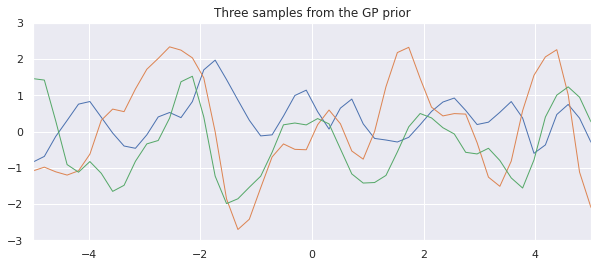

In [ ]:
# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
sns.set(rc={'figure.figsize':(10, 4), "lines.linewidth": 1.0})
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

* Note that the K_ss variable here corresponds to K<sub>* *</sub> in the equation above for the joint probability. It will be used again below, along with K and K*

* Now we’ll observe some data. The actual function generating the y values from our x values, unbeknownst to our model, is the sin function. 

* We generate the output at our 5 training points, do the equivalent of the above-mentioned 4 pages of matrix algebra in a few lines of python code, sample from the posterior and plot it.

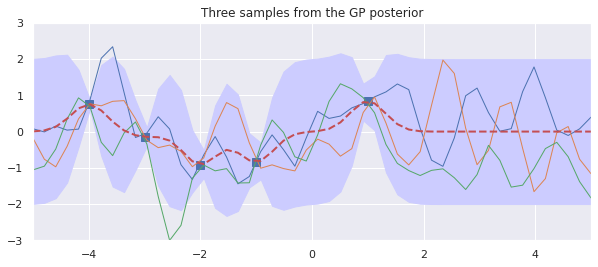

In [ ]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

sns.set(rc={'figure.figsize':(10, 4), "lines.linewidth": 1.0})
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#CCCCFF")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()

* the training points (the blue squares) have “reined in” the set of possible functions: the ones we have sampled from the posterior all go through those points. 

* The dotted red line shows the mean output and the grey area shows 2 standard deviations from the mean. 

* Note that this is 0 at our training points (because we did not add any noise to our data). 

* Also note how things start to go a bit wild again to the right of our last training point x = 1 - that won’t get reined in until we observe some data over there.

https://machinelearningmastery.com/what-is-bayesian-optimization/

# **Gaussian Process (external)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install GPy==1.9.8 --q

In [ ]:
try:
    # Check if notebook is running in Google Colab
    import google.colab
    # Get additional files from Github
    !wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/gaussian_processes_util.py
    # Install additional dependencies
    !pip install GPy==1.9.8
except:
    pass

## Introduction

In supervised learning, we often use parametric models $p(\mathbf{y} \lvert \mathbf{X},\boldsymbol\theta)$ to explain data and infer optimal values of parameter $\boldsymbol\theta$ via [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) or [maximum a posteriori](https://de.wikipedia.org/wiki/Maximum_a_posteriori) estimation. If needed we can also infer a full [posterior distribution](https://en.wikipedia.org/wiki/Posterior_probability) $p(\boldsymbol\theta \lvert \mathbf{X},\mathbf{y})$ instead of a point estimate $\boldsymbol{\hat\theta}$. With increasing data complexity, models with a higher number of parameters are usually needed to explain data reasonably well. Methods that use models with a fixed number of parameters are called parametric methods. 

In non-parametric methods, on the other hand, the number of parameters depend on the dataset size. For example, in [Nadaraya-Watson kernel regression](https://en.wikipedia.org/wiki/Kernel_regression), a weight $w_i$ is assigned to each observed target $y_i$ and for predicting the target value at a new point $\mathbf{x}$ a weighted average is computed: 

$$f(\mathbf{x}) = \sum_{i=1}^{N}w_i(\mathbf{x})y_i$$

$$w_i(\mathbf{x}) = \frac{\kappa(\mathbf{x}, \mathbf{x}_{i})}{\sum_{i'=1}^{N}\kappa(\mathbf{x}, \mathbf{x}_{i'})}$$

Observations that are closer to $\mathbf{x}$ have a higher weight than observations that are further away. Weights are computed from $\mathbf{x}$ and observed $\mathbf{x}_i$ with a kernel $\kappa$. A special case is k-nearest neighbors (KNN) where the $k$ closest observations have a weight $1/k$, and all others have weight $0$. Non-parametric methods often need to process all training data for prediction and are therefore slower at inference time than parametric methods. On the other hand, training is usually faster as non-parametric models only need to remember training data. 

Another example of non-parametric methods are [Gaussian processes](https://en.wikipedia.org/wiki/Gaussian_process) (GPs). Instead of inferring a distribution over the parameters of a parametric function Gaussian processes can be used to infer a distribution over functions directly. A Gaussian process defines a prior over functions. After having observed some function values it can be converted into a posterior over functions. Inference of continuous function values in this context is known as GP regression but GPs can also be used for classification. 

A Gaussian process is a [random process](https://en.wikipedia.org/wiki/Stochastic_process) where any point $\mathbf{x} \in \mathbb{R}^d$ is assigned a random variable $f(\mathbf{x})$ and where the joint distribution of a finite number of these variables $p(f(\mathbf{x}_1),...,f(\mathbf{x}_N))$ is itself Gaussian:

$$p(\mathbf{f} \lvert \mathbf{X}) = \mathcal{N}(\mathbf{f} \lvert \boldsymbol\mu, \mathbf{K})\tag{1}\label{eq1}$$

In Equation $(1)$, $\mathbf{f} = (f(\mathbf{x}_1),...,f(\mathbf{x}_N))$, $\boldsymbol\mu = (m(\mathbf{x}_1),...,m(\mathbf{x}_N))$ and $K_{ij} = \kappa(\mathbf{x}_i,\mathbf{x}_j)$. $m$ is the mean function and it is common to use $m(\mathbf{x}) = 0$ as GPs are flexible enough to model the mean arbitrarily well. $\kappa$ is a positive definite *kernel function* or *covariance function*. Thus, a Gaussian process is a distribution over functions whose shape (smoothness, ...) is defined by $\mathbf{K}$. If points $\mathbf{x}_i$ and $\mathbf{x}_j$ are considered to be similar by the kernel the function values at these points, $f(\mathbf{x}_i)$ and $f(\mathbf{x}_j)$, can be expected to be similar too. 

A GP prior $p(\mathbf{f} \lvert \mathbf{X})$ can be converted into a GP posterior $p(\mathbf{f} \lvert \mathbf{X},\mathbf{y})$ after having observed some data $\mathbf{y}$. The posterior can then be used to make predictions $\mathbf{f}_*$ given new input $\mathbf{X}_*$:

$$
\begin{align*}
p(\mathbf{f}_* \lvert \mathbf{X}_*,\mathbf{X},\mathbf{y}) 
&= \int{p(\mathbf{f}_* \lvert \mathbf{X}_*,\mathbf{f})p(\mathbf{f} \lvert \mathbf{X},\mathbf{y})}\ d\mathbf{f} \\ 
&= \mathcal{N}(\mathbf{f}_* \lvert \boldsymbol{\mu}_*, \boldsymbol{\Sigma}_*)\tag{2}\label{eq2}
\end{align*}
$$

Equation $(2)$ is the posterior predictive distribution which is also a Gaussian with mean $\boldsymbol{\mu}_*$ and $\boldsymbol{\Sigma}_*$. By definition of the GP, the joint distribution of observed data $\mathbf{y}$ and predictions $\mathbf{f}_*$  is

$$
\begin{pmatrix}\mathbf{y} \\ \mathbf{f}_*\end{pmatrix} \sim \mathcal{N}
\left(\boldsymbol{0},
\begin{pmatrix}\mathbf{K}_y & \mathbf{K}_* \\ \mathbf{K}_*^T & \mathbf{K}_{**}\end{pmatrix}
\right)\tag{3}\label{eq3}
$$

With $N$ training data and $N_*$ new input data, $\mathbf{K}_y = \kappa(\mathbf{X},\mathbf{X}) + \sigma_y^2\mathbf{I} = \mathbf{K} + \sigma_y^2\mathbf{I}$ is $N \times N$, $\mathbf{K}_* = \kappa(\mathbf{X},\mathbf{X}_*)$ is $N \times N_*$ and $\mathbf{K}_{**} = \kappa(\mathbf{X}_*,\mathbf{X}_*)$ is $N_* \times N_*$. $\sigma_y^2$ is the noise term in the diagonal of $\mathbf{K_y}$. It is set to zero if training targets are noise-free and to a value greater than zero if observations are noisy. The mean is set to $\boldsymbol{0}$ for notational simplicity. The sufficient statistics of the posterior predictive distribution, $\boldsymbol{\mu}_*$ and $\boldsymbol{\Sigma}_*$, can be computed with<sup>[1][3]</sup>

$$
\begin{align*}
\boldsymbol{\mu_*} &= \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{y}\tag{4}\label{eq4} \\
\boldsymbol{\Sigma_*} &= \mathbf{K}_{**} - \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{K}_*\tag{5}\label{eq5}
\end{align*}
$$

This is the minimum we need to know for implementing Gaussian processes and applying them to regression problems. For further details, please consult the literature in the [References](#References) section. The next section shows how to implement GPs with plain NumPy from scratch, later sections demonstrate how to use GP implementations from [scikit-learn](http://scikit-learn.org/stable/) and [GPy](http://sheffieldml.github.io/GPy/).

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

http://krasserm.github.io/2018/03/19/gaussian-processes/

## Implementation with NumPy

Here, we will use the squared exponential kernel, also known as Gaussian kernel or RBF kernel:

$$
\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}
  (\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j))\tag{6}
$$

The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel). 

In [ ]:
import numpy as np

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes 
    a covariance matrix from points in X1 and X2.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

There are many other kernels that can be used for Gaussian processes. See \[3\] for a detailed reference or the scikit-learn documentation for [some examples](http://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels).

### Prior

Let's first define a prior over functions with mean zero and a covariance matrix computed with kernel parameters $l=1$ and $\sigma_f=1$. To draw random functions from that GP we draw random samples from the corresponding multivariate normal. The following example draws three random samples and plots it together with the zero mean and the 95% confidence interval (computed from the diagonal of the covariance matrix).

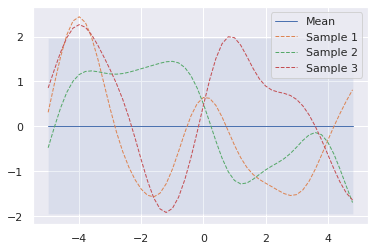

In [ ]:
%matplotlib inline

from gaussian_processes_util import plot_gp

#sns.set(rc={'figure.figsize':(10, 6), "lines.linewidth": 1.0})

# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# Plot GP mean, confidence interval and samples 
plot_gp(mu, cov, X, samples=samples)

The `plot_gp` function is defined [here](gaussian_processes_util.py).

### Prediction from noise-free training data

To compute the sufficient statistics i.e. mean and covariance of the posterior predictive distribution we implement Equations $(4)$ and $(5)$

In [ ]:
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

and apply them to noise-free training data `X_train` and `Y_train`. The following example draws three samples from the posterior predictive and plots them along with the mean, confidence interval and training data. In a noise-free model, variance at the training points is zero and all random functions drawn from the posterior go through the trainig points. 

In [ ]:
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})

# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

NameError: ignored

### Prediction from noisy training data

If some noise is included in the model, training points are only approximated and the variance at the training points is non-zero.

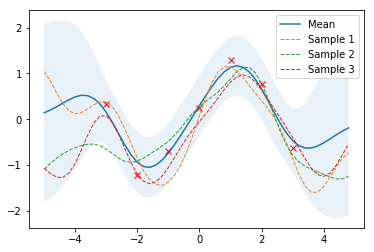

In [ ]:
noise = 0.4

# Noisy training data
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

### Effect of kernel parameters and noise parameter

The following example shows the effect of kernel parameters $l$ and $\sigma_f$ as well as the noise parameter $\sigma_y$. Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. Lower $l$ values make functions more wiggly with wide confidence intervals between training data points. $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide confidence intervals outside the training data region in the right figure of the second row. $\sigma_y$ represents the amount of noise in the training data. Higher $\sigma_y$ values make more coarse approximations which avoids overfitting to noisy data.

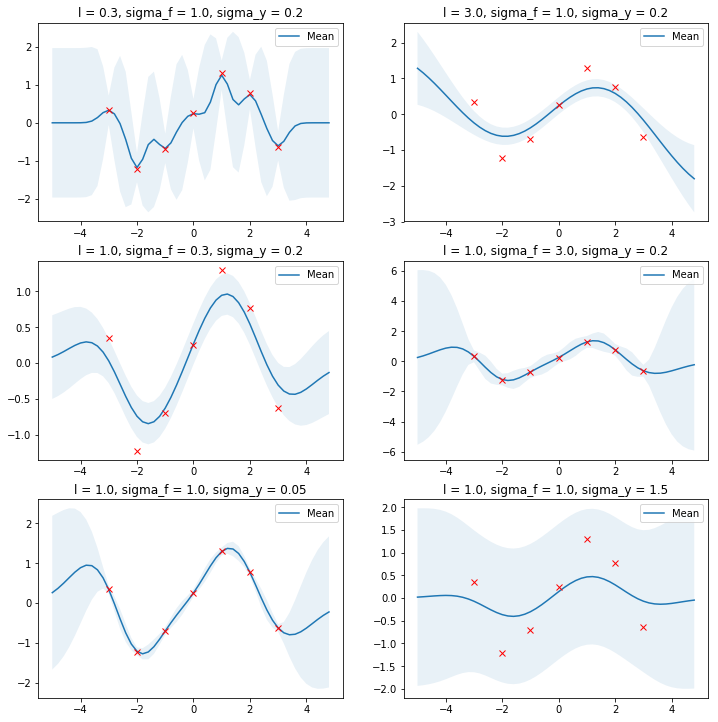

In [ ]:
import matplotlib.pyplot as plt

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, 
                                       sigma_f=sigma_f, 
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

Optimal values for these parameters can be estimated by maximizing the log marginal likelihood which is given by<sup>[1][3]</sup>

$$
\log p(\mathbf{y} \lvert \mathbf{X}) = 
\log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{0},\mathbf{K}_y) =
-\frac{1}{2} \mathbf{y}^T \mathbf{K}_y^{-1} \mathbf{y} 
-\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_y\end{vmatrix} 
-\frac{N}{2} \log(2\pi) \tag{7}
$$

In the following we will minimize the negative log marginal likelihood w.r.t. parameters $l$ and $\sigma_f$, $\sigma_y$ is set to the known noise level of the data. If the noise level is unknown, $\sigma_y$ can be estimated as well along with the other parameters. 

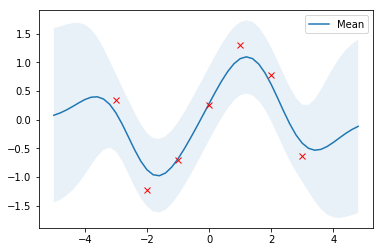

In [ ]:
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise, naive=True):
    '''
    Returns a function that computes the negative log marginal
    likelihood for training data X_train and Y_train and given 
    noise level.
    
    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        naive: if True use a naive implementation of Eq. (7), if 
               False use a numerically more stable implementation. 
        
    Returns:
        Minimization objective.
    '''
    def nll_naive(theta):
        # Naive implementation of Eq. (7). Works well for the examples 
        # in this article but is numerically less stable compared to 
        # the implementation in nll_stable below.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    def nll_stable(theta):
        # Numerically more stable implementation of Eq. (7) as described
        # in http://www.gaussianprocess.org/gpml/chapters/RW2.pdf, Section
        # 2.2, Algorithm 2.1.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.T.dot(lstsq(L.T, lstsq(L, Y_train)[0])[0]) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    
    if naive:
        return nll_naive
    else:
        return nll_stable

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.
res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

With optimized kernel parameters, training data are reasonably covered by the 95% confidence interval and the mean of the posterior predictive is a good approximation.

### Higher dimensions

The above implementation can also be used for higher input data dimensions. Here, a GP is used to fit noisy samples from a sine wave originating at $\boldsymbol{0}$ and expanding in the x-y plane. The following plots show the noisy samples and the posterior predictive mean before and after kernel parameter optimization.

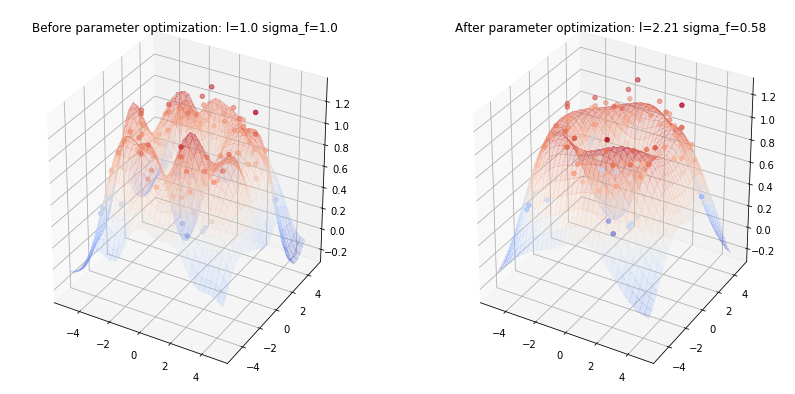

In [ ]:
from gaussian_processes_util import plot_gp_2D

noise_2D = 0.1

rx, ry = np.arange(-5, 5, 0.3), np.arange(-5, 5, 0.3)
gx, gy = np.meshgrid(rx, rx)

X_2D = np.c_[gx.ravel(), gy.ravel()]

X_2D_train = np.random.uniform(-4, 4, (100, 2))
Y_2D_train = np.sin(0.5 * np.linalg.norm(X_2D_train, axis=1)) + \
             noise_2D * np.random.randn(len(X_2D_train))

plt.figure(figsize=(14,7))

mu_s, _ = posterior_predictive(X_2D, X_2D_train, Y_2D_train, sigma_y=noise_2D)
plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train, 
           f'Before parameter optimization: l={1.00} sigma_f={1.00}', 1)

res = minimize(nll_fn(X_2D_train, Y_2D_train, noise_2D), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

mu_s, _ = posterior_predictive(X_2D, X_2D_train, Y_2D_train, *res.x, sigma_y=noise_2D)
plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train,
           f'After parameter optimization: l={res.x[0]:.2f} sigma_f={res.x[1]:.2f}', 2)

Note how the true sine wave is approximated much better after parameter optimization.

## Libraries that implement GPs

This section shows two examples of libraries that provide implementations of GPs. I'll provide only a minimal setup here, just enough for reproducing the above results. For further details please consult the documentation of these libraries.

### Scikit-learn

Scikit-learn provides a `GaussianProcessRegressor` for implementing [GP regression models](http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-regression-gpr). It can be configured with [pre-defined kernels and user-defined kernels](http://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels). Kernels can also be composed. The squared exponential kernel is the `RBF` kernel in scikit-learn. The `RBF` kernel only has a `length_scale` parameter which corresponds to the $l$ parameter above. To have a $\sigma_f$ parameter as well, we have to compose the `RBF` kernel with a `ConstantKernel`.

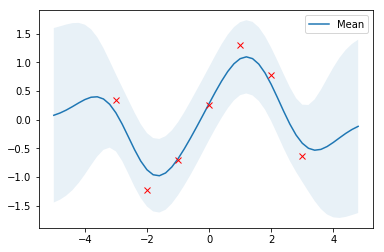

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)

# Reuse training data from previous 1D example
gpr.fit(X_train, Y_train)

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

# Obtain optimized kernel parameters
l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])

# Compare with previous results
assert(np.isclose(l_opt, l))
assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

### GPy

[GPy](http://sheffieldml.github.io/GPy/) is a Gaussian processes framework from the Sheffield machine learning group. It provides a `GPRegression` class for implementing GP regression models. By default, `GPRegression` also estimates the noise parameter $\sigma_y$ from data, so we have to `fix()` this parameter to be able to reproduce the above results.

In [ ]:
import GPy

rbf = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
gpr = GPy.models.GPRegression(X_train, Y_train, rbf)

# Fix the noise variance to known value 
gpr.Gaussian_noise.variance = noise**2
gpr.Gaussian_noise.variance.fix()

# Run optimization
gpr.optimize();

# Display optimized parameter values
display(gpr)

GP_regression.,value,constraints,priors
rbf.variance,0.6078930786683978,+ve,
rbf.lengthscale,0.9242513823591277,+ve,
Gaussian_noise.variance,0.16000000000000003,+ve fixed,


 /home/martin/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


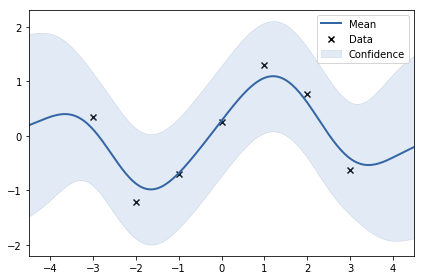

In [ ]:
# Obtain optimized kernel parameters
l = gpr.rbf.lengthscale.values[0]
sigma_f = np.sqrt(gpr.rbf.variance.values[0])

# Compare with previous results
assert(np.isclose(l_opt, l))
assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results with the built-in plot function
gpr.plot();

Thanks for reading up to here :-) In another article, I'll show how Gaussian processes can be used for black-box optimization.

## References

\[1\] Kevin P. Murphy. [Machine Learning, A Probabilistic Perspective](https://mitpress.mit.edu/books/machine-learning-0), Chapters 4, 14 and 15.  
\[2\] Christopher M. Bishop. [Pattern Recognition and Machine Learning](http://www.springer.com/de/book/9780387310732), Chapter 6.  
\[3\] Carl Edward Rasmussen and Christopher K. I. Williams. [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/).  

# **Ornstein-Uhlenbeck Process**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Characteristics & Relevance of Ornstein-Uhlenbeck Process**

**Simulating a stochastic differential equation**

* the Ornstein–Uhlenbeck process is a **stochastic process** with applications in financial mathematics and the physical sciences. 

* Its original application in physics was as a model for the **<u>velocity</u> of a massive Brownian particle under the influence of <u>friction</u>**. It is named after Leonard Ornstein and George Eugene Uhlenbeck.

* The Ornstein–Uhlenbeck process is a **stationary Gauss–Markov process**, which means that it is a **Gaussian process, a Markov process, and is temporally homogeneous**. In fact, it is the only nontrivial process that satisfies these three conditions, up to allowing linear transformations of the space and time variables.

* Over time, the process tends to **drift towards its mean function**: such a process is called **mean-reverting**.

* The process can be considered to be a **modification of the random walk in continuous time, or Wiener process**, in which the properties of the process have been changed so that there is a tendency of the walk to move back towards a central location, with a greater attraction when the process is further away from the center. 

* The Ornstein–Uhlenbeck process can also be considered as the **continuous-time analogue of the discrete-time AR(1) process**.

* The Ornstein–Uhlenbeck process can be interpreted as a **scaling limit of a discrete process**, in the same way that Brownian motion is a scaling limit of random walks.

* Generalization: It is possible to extend Ornstein–Uhlenbeck processes to processes where the background driving process is a Lévy process (instead of a simple Brownian motion).

* In addition, in finance, stochastic processes are used where the volatility increases for larger values of C.

**Wiener Process & Ornstein-Uhlenbeck**

* The problem raised by the **non-rectifiable paths** of the Wiener process in the modeling of Brownian paths leads to the Ornstein-Uhlenbeck process and also makes the need for a theory of stochastic integration and differentiation clear

* here it is not the motion but the speed of the particle as one that is not rectifiable process derived from the Wiener process, from which one obtains rectifiable particle paths through integration.

**Additional**

* Stochastic differential equations (SDEs) model dynamical systems that are subject to noise. 

* An Ornstein-Uhlenbeck process is a solution of the Langevin equation. This model describes the stochastic evolution of a particle in a fluid under the influence of friction. The particle's movement is due to collisions with the molecules of the fluid (diffusion). The difference with the Brownian motion is the presence of friction.

* The Ornstein-Uhlenbeck process is stationary, Gaussian, and Markov, which makes it a good candidate to represent stationary random noise.

* We will simulate this process with a numerical method called the Euler-Maruyama method. It is a simple generalization to SDEs of the Euler method for ODEs.

**Characteristics and Relevance for Residuals Analysis**

* A stationary process is a process that is ``statistically invariant under translations’’
* the Ornstein-Uhlenbeck process is stationary (Brownian motion is not)
* The Ornstein–Uhlenbeck process (just like the Brownian Bridge) a
is an example of a **Gaussian process whose increments are not independent**.
* Look for stock returns devoid of explanatory factors, and analyze the corresponding residuals as stochastic processes. (e.g. mean reverting?)
* Can residuals be fitted to (increments of) OU processes or other MR processes?
If so, what is the typical correlation time-scale?
* Mean reversion days: how long does it take to converge (e.g. model distribution of days).

## **Stochastic Differential Equations**

add equations: https://en.m.wikipedia.org/wiki/Ornstein–Uhlenbeck_process

## **Applications**

**In Financial Mathematics**

* The Ornstein–Uhlenbeck process is one of several approaches used to model (with modifications) interest rates, currency exchange rates, and commodity prices stochastically. 

* The parameter μ (mu) represents the equilibrium or mean value supported by fundamentals; σ (signa) the degree of volatility around it caused by shocks, and θ (theta) the rate by which these shocks dissipate and the variable reverts towards the mean. 

* One application of the process is a trading strategy known as pairs trade.

## **Create Ornstein-Uhlenbeck Process**

In [ ]:
# Function parameters

sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant

# Simulation parameters

dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times

# Define renormalized variables (to avoid recomputing these constants at every time step)

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

# Create a vector that will contain all successive values of our process during the simulation:
x = np.zeros(n)

simulate the process with the Euler-Maruyama method. It is really like the standard Euler method for ODEs, but with an extra stochastic term (which is just a scaled normal random variable). 

In [ ]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

Visualize

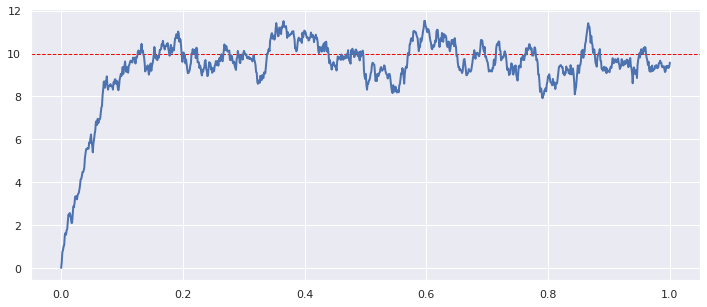

In [ ]:
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
fig, ax = plt.subplots(1, 1)
plt.axhline(y=10, color='red', linestyle='--', linewidth=1.0)
ax.plot(t, x, lw=2)

* Stationary and mean-reverting around mean=10 (red dotted line)
* In financial engineering: how long does it take in average to converge? mean-reversion is an investment opportunity!
* Now, we are going to take a look at the time evolution of the distribution of the process. To do this, we will simulate many independent realizations of the same process in a vectorized way. We define a vector X that will contain all realizations of the process at a given time (that is, we do not keep all realizations at all times in memory). This vector will be overwritten at every time step. We will show the estimated distribution (histograms) at several points in time:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


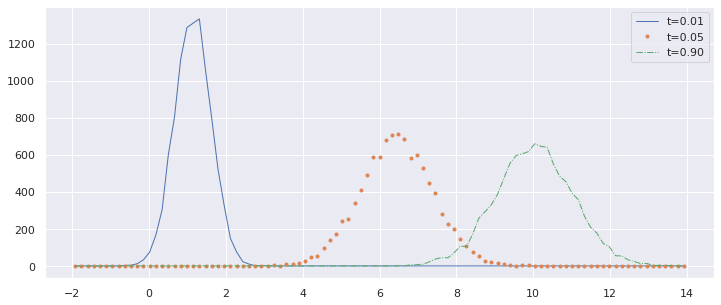

In [ ]:
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})

ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1)
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

The distribution of the process tends to a Gaussian distribution with mean μ=10 and standard deviation σ=1. The process would be stationary if the initial distribution was also a Gaussian with the adequate parameters.

The Langevin equation that we use in this recipe is the following stochastic differential equation:

>$d x=-\frac{(x-\mu)}{\tau} d t+\sigma \sqrt{\frac{2}{\tau}} d W$

https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/

# **Lévy Process**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* A Lévy process is a stochastic process with **[independent, stationary increments](https://de.m.wikipedia.org/wiki/Prozess_mit_unabhängigen_Zuwächsen)** (= the course of the future of the process is independent of the past): it represents the motion of a point whose successive displacements are random and independent, and statistically identical over different time intervals of the same length. 

* A Lévy process may thus be viewed as the **continuous-time analog of a random walk**.

* The most well known **examples of Lévy processes are Wiener process (~ Brownian motion), and Poisson process**. Aside from Brownian motion with drift, all other proper (that is, not deterministic) Lévy processes have discontinuous paths.

**Properties**

1. X<sub>0</sub> = 0, almost surely
2. Independence of increments
3. Stationary increments
4. Continuity in probability

**Lévy–Itô decomposition**

Because the characteristic functions of independent random variables multiply, the Lévy–Khintchine theorem suggests that every Lévy process is the sum of Brownian motion with drift and another independent random variable. The Lévy–Itô decomposition describes the latter as a (stochastic) sum of independent Poisson random variables.

# **Bernoulli Process**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Bernoulli Distribution**

* The Bernoulli distribution is the discrete probability distribution of a random variable which takes a binary, boolean output: 1 with probability p, and 0 with probability (1-p). 

* The idea is that, whenever you are running an experiment which might lead either to a success or to a failure, you can associate with your success (labeled with 1) a probability p, while your insuccess (labeled with 0) will have probability (1-p).

* The repetition of multiple independent Bernoulli trials is called a Bernoulli process.

* The outcomes of a Bernoulli process will follow a [Binomial distribution](https://en.m.wikipedia.org/wiki/Binomial_distribution). As such, the Bernoulli distribution would be a Binomial distribution with a single trial. The [Bernoulli distribution](https://en.m.wikipedia.org/wiki/Bernoulli_distribution) is a special case of the binomial distribution where a single trial is conducted (so n would be 1 for such a binomial distribution). It is also a special case of the two-point distribution, for which the possible outcomes need not be 0 and 1.

https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/

**Bernoulli Process**

* A Bernoulli process is a finite or infinite sequence of binary random variables, so it is a discrete-time stochastic process that takes only two values, canonically 0 and 1. 

* The component Bernoulli variables X<sub>i</sub> are [identically distributed and independent](https://en.m.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables). Prosaically, a Bernoulli process is a repeated coin flipping, possibly with an unfair coin (but with consistent unfairness). 

* Every variable X<sub>i</sub> in the sequence is associated with a Bernoulli trial or experiment. They all have the same Bernoulli distribution. Much of what can be said about the Bernoulli process can also be generalized to more than two outcomes (such as the process for a six-sided dice); this generalization is known as the **Bernoulli scheme**.

* The problem of determining the process, given only a limited sample of Bernoulli trials, may be called the problem of checking whether a coin is fair.

**Properties**

A Bernoulli process is a **finite or infinite sequence of independent random variables** X1, X2, X3, ..., such that:

* for each i, the value of Xi is either 0 or 1;

* for all values of i, the probability p that Xi = 1 is the same.

In other words, a Bernoulli process is a **sequence of independent identically distributed** Bernoulli trials.

Independence of the trials implies that the **process is memoryless**. Given that the probability p is known, past outcomes provide no information about future outcomes. (If p is unknown, however, the past informs about the future indirectly, through inferences about p.)

If the process is infinite, then from any point the future trials constitute a Bernoulli process identical to the whole process, the fresh-start property.



# **Poisson (Point) Process**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Poisson point process is a type of random mathematical object that consists of points randomly located on a mathematical space

* Its name derives from the fact that if a collection of random points in some space forms a Poisson process, then the number of points in a region of finite size is a random variable with a Poisson distribution. 

* The process was discovered independently and repeatedly in several settings, including experiments on radioactive decay, telephone call arrivals and insurance mathematics. The Poisson point process is often defined on the real line, where it can be considered as a stochastic process. 

* In this setting, it is used, for example, in queueing theory to model random events, such as the arrival of customers at a store, phone calls at an exchange or occurrence of earthquakes, distributed in time. In the plane, the point process, also known as a spatial Poisson process, can represent the locations of scattered objects such as transmitters in a wireless network, particles colliding into a detector, or trees in a forest.

* In all settings, the Poisson point process has the property that each point is stochastically independent to all the other points in the process, which is why it is sometimes called a purely or completely random process.

* Despite its wide use as a stochastic model of phenomena representable as points, the inherent nature of the process implies that it does not adequately describe phenomena where there is sufficiently strong interaction between the points. This has inspired the proposal of other point processes, some of which are constructed with the Poisson point process, that seek to capture such interaction.

**Examples**

Poisson processes can be seen in all walks of life. Here are some examples:

* At a drive-through pharmacy, the number of cars driving up to the drop off window in some interval of time.
* The number of hot dogs sold by Papaya King from 12pm to 4pm on Sundays.
* Failures of ultrasound machines in a hospital.
* The number of vehicles passing through some intersection from 8am to 11am on weekdays.
* Number of electrical pulses generated by a photo-detector that is exposed to a beam of photons, in 1 minute.

**Homogeneous vs nonhomogeneous Poisson point process**

* The point process depends on a single mathematical object, which, depending on the context, may be a constant, a locally integrable function or, in more general settings, a [Radon measure](https://en.m.wikipedia.org/wiki/Radon_measure). 

* In the first case, the constant, known as the rate or intensity, is the average density of the points in the Poisson process located in some region of space. The resulting point process is called a homogeneous or stationary Poisson point process.

* In the second case, the point process is called an inhomogeneous or nonhomogeneous Poisson point process, and the average density of points depend on the location of the underlying space of the Poisson point process. 

* The word point is often omitted, but there are other Poisson processes of objects, which, instead of points, consist of more complicated mathematical objects such as lines and polygons, and such processes can be based on the Poisson point process.

**Relationship to other processes**

* On the real line, the Poisson process is a type of **continuous-time Markov process** known as a birth-death process (with just births and zero deaths) and is called a pure or simple birth process.

* More complicated processes with the Markov property, such as Markov arrival processes, have been defined where the Poisson process is a special case

**Properties**

* It is made up of a sequence of random variables X1, X2, X3, …Xk such that each variable represents the number of occurrences of some event, such as patients walking into an ER, during some interval of time.

* It is a stochastic process. Each time you run the Poisson process, it will produce a different sequence of random outcomes as per some probability distribution which we will soon see.

* It is a discrete process. The Poisson process’s outcomes are the number of occurrences of some event in the specified period of time, which is undoubtedly an integer —i.e. a discrete number.

* It has independent increments. What this is means is that the number of events that the process predicts will occur in any given interval, is independent of the number in any other disjoint interval. For e.g. the number of people walking into the ER from time zero (start of the observation) up through 10am, is independent of the number walking in from 3:33pm to 8:26pm, or from 11:00pm to 11:05pm and so on.

* The Poisson process’s constituent variables X1, X2, X3,…Xk all have identical distribution.

* The Poisson process’s constituent variables X1, X2, X3,…Xk all have a Poisson distribution, which is given by the Probability Mass Function:

> $P_{X}(k)=\frac{e^{-\lambda} * \lambda^{k}}{k !}$

** Modeling inter-arrival times**

The Poisson process has a remarkable substructure. Even though the number of occurrence of events is modeled using a discrete Poisson distribution, the interval of time between consecutive events can be modeled using the Exponential distribution,which is a continuous distribution.

https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a

EVENT_NUM,INTER_EVENT_T,EVENT_T
0,0.10150270056031621,0.10150270056031621
1,0.42452001116902405,0.5260227117293402
2,0.13996018532449359,0.6659828970538338
3,0.13934066042200863,0.8053235574758425
4,1.0281588901992251,1.8334824476750677
5,0.3656752130696071,2.199157660744675
6,0.37403305690219324,2.5731907176468685
7,0.007754653021082217,2.580945370667951
8,0.11157366654747107,2.6925190372154217
9,0.6158460329113915,3.308365070126813
10,0.2818623215750301,3.590227391701843
11,0.009533219749721027,3.599760611451564
12,0.010406123334336142,3.6101667347859
13,0.17302973005534117,3.7831964648412413
14,0.24941239809822427,4.032608862939465
15,0.010998629842780761,4.043607492782246
16,0.030023782941192352,4.0736312757234385
17,0.2838524178682007,4.3574836935916395
18,0.165580548420293,4.523064242011932
19,0.0047352303191412915,4.527799472331074
20,0.05761603589650603,4.585415508227579
21,0.5010600896516919,5.0864755978792715
22,0.07822983431906304,5.164705432198335
23,0.0714624593316753,5.23

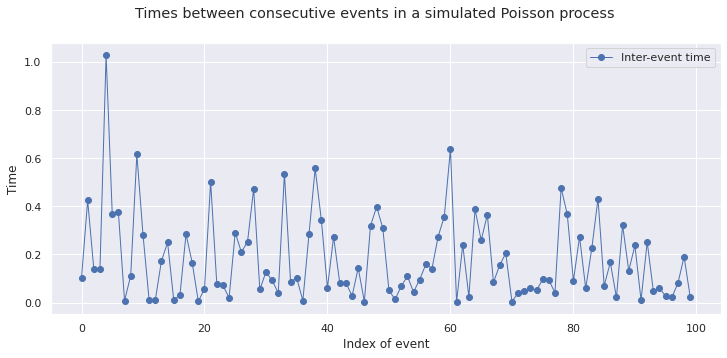

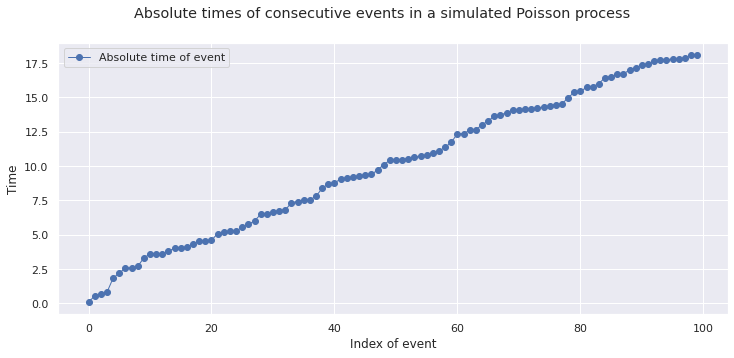

INTERVAL_NUM,NUM_EVENTS
1,4
2,1
3,4
4,5
5,7
6,6
7,6
8,5
9,3
10,7
11,9
12,3
13,4
14,5
15,10
16,4
17,5
18,10
5.444444444444445


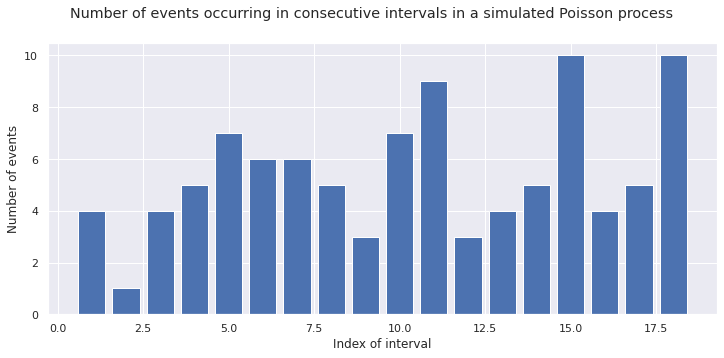

In [ ]:
import random
import math
import statistics

sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})

_lambda = 5
_num_events = 100
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#Get a random probability value from the uniform distribution's PDF
	n = random.random()

	#Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	_inter_event_time = -math.log(1.0 - n) / _lambda
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	print(str(i) +',' + str(_inter_event_time) + ',' + str(_event_time))

#plot the inter-event times
fig = plt.figure()
fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


#plot the absolute event times
fig = plt.figure()
fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _event_times, 'bo-', label='Absolute time of event')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#print the mean number of events per unit time
print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Number of events occurring in consecutive intervals in a simulated Poisson process')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('Index of interval')
plt.ylabel('Number of events')
plt.show()

# **Markov Processes (Markov Chains)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A Markov chain is a **discrete-time stochastic process** that progresses from one state to another with certain probabilities that can be **represented by a graph and state transition matrix P** as indicated below:

<img src="https://raw.githubusercontent.com/deltorobarba/machinelearning/master/markov.PNG" alt="markov">

**Definition**

* A Markov chain is a mathematical system that experiences transitions from one state to another according to certain probabilistic rules. In a Markov Chain the next state depends only on the current state, the **Markov property**. (A state in this context refers to the assignment of values to the parameters). The concept of a Markov Chain is that we do not need to know the entire history of a process to predict the next output, an approximation that works well in many real-world situations.

* The defining characteristic of a Markov chain is that no matter how the process arrived at its present state, the possible future states are fixed. In other words, the probability of transitioning to any particular state is dependent solely on the current state and time elapsed. Hence, a **Markov Chain is memoryless** because only the current state matters and not how it arrived in that state.

* The **state space**, or set of all possible states, can be anything: letters, numbers, weather conditions, baseball scores, or stock performances.

* Markov chains may be modeled by **finite state machines, and random walks** provide a prolific example of their usefulness in mathematics. They arise broadly in statistical and information-theoretical contexts and are widely employed in economics, game theory, queueing (communication) theory, genetics, and finance. While it is possible to discuss Markov chains with any size of state space, the initial theory and most applications are focused on cases with a finite (or countably infinite) number of states.

## **Properties**

A variety of descriptions of either a specific state in a Markov chain or the entire Markov chain allow for better understanding of the Markov chain's behavior. Let P be the transition matrix of Markov chain {X0, X1, ...}.

* **Reducibility**: a Markov chain is said to be irreducible if it is possible to get to any state from any state. In other words, a Markov chain is irreducible if there exists a chain of steps between any two states that has positive probability.

* **Periodicity**: a state in a Markov chain is periodic if the chain can return to the state only at multiples of some integer larger than 1. Thus, starting in state 'i', the chain can return to 'i' only at multiples of the period 'k', and k is the largest such integer. State 'i' is aperiodic if k = 1 and periodic if k > 1.

* **Transience and Recurrence**: A state 'i' is said to be transient if, given that we start in state 'i', there is a non-zero probability that we will never return to 'i'. State i is recurrent (or persistent) if it is not transient. A recurrent state is known as positive recurrent if it is expected to return within a finite number of steps and null recurrent otherwise. Transience and recurrence issues are central to the study of Markov chains and help describe the Markov chain's overall structure. The presence of many transient states may suggest that the Markov chain is absorbing, and a strong form of recurrence is necessary in an ergodic Markov chain.

* **Ergodicity**: a state 'i' is said to be ergodic if it is aperiodic and positive recurrent. If all states in an irreducible Markov chain are ergodic, then the chain is said to be ergodic. Ergodic Markov chains are, in some senses, the processes with the "nicest" behavior.

* **Absorbing State**: a state i is called absorbing if it is impossible to leave this state. Therefore, the state 'i' is absorbing if pii = 1 and pij = 0 for i ≠ j. If every state can reach an absorbing state, then the Markov chain is an absorbing Markov chain. Absorbing states are crucial for the discussion of absorbing Markov chains. A common type of Markov chain with transient states is an absorbing one. An absorbing Markov chain is a Markov chain in which it is impossible to leave some states, and any state could (after some number of steps, with positive probability) reach such a state. It follows that all non-absorbing states in an absorbing Markov chain are transient.

**Relation to Random Walks**

* Various types of random walks are of interest, which can differ in several ways. The term itself most often refers to a special category of Markov chains or Markov processes, but many time-dependent processes are referred to as random walks, with a modifier indicating their specific properties. 

* Random walks (Markov or not) can also take place on a variety of spaces: commonly studied ones include graphs, others on the integers or the real line, in the plane or higher-dimensional vector spaces, on curved surfaces or higher-dimensional Riemannian manifolds, and also on groups finite, finitely generated or Lie.

## **Stochastic (State Transition) Matrix**

* A stochastic matrix is a square matrix used to describe the transitions of a Markov chain. This means a transition matrix contains information on the **probability of transitioning between states**.

* Each of its entries is a nonnegative real number representing a probability. It is also called a probability matrix, transition matrix, substitution matrix, or Markov matrix.

* A stochastic matrix describes a Markov chain X<sub>t</sub> over a [**finite state space (Probability space) S**](https://en.m.wikipedia.org/wiki/Probability_space) with cardinality S.

* If the probability of moving from i to j in one time step is Pr(j|i)= P<sub>i,j</sub>, the stochastic matrix P is given by using P<sub>i,j</sub> as the ith row and jth column element, e.g.,

This means each row of the matrix is a probability vector, and the sum of its entries is 1. The total of transition probability from a state i to all other states must be 1.

> $P=\left[\begin{array}{cccccc}
P_{1,1} & P_{1,2} & \dots & P_{1, j} & \dots & P_{1, S} \\
P_{2,1} & P_{2,2} & \dots & P_{2, j} & \dots & P_{2, S} \\
\vdots & \vdots & \ddots & \vdots & \ddots & \vdots \\
P_{i, 1} & P_{i, 2} & \dots & P_{i, j} & \dots & P_{i, S} \\
\vdots & \vdots & \ddots & \vdots & \ddots & \vdots \\
P_{S, 1} & P_{S, 2} & \dots & P_{S, j} & \dots & P_{S, S}
\end{array}\right]$

## **Stationary Distribution**

The implementation below is not a simulation of the state transitions, just a calculation of the stationary distribution. Let’s start with an iterative approach to calculating the distribution. What we are doing is raising the transition matrix to the power of the number of iterations.

> $s_{1}=s_{0} P, \quad s_{2=} s_{1} P=\left(s_{o} P\right) P=s_{0} P^{2} \ldots . \quad s_{n}=s_{0} P^{n}$

The stationary distribution is usually referred to as π.

> $\pi=s_{0} P^{n} ; n \rightarrow \infty$


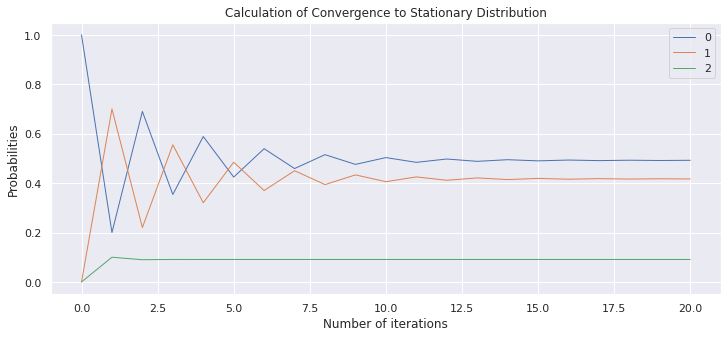

In [ ]:
from random import seed
from random import random
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})

P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

state=np.array([[1.0, 0.0, 0.0]])

stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]

iterations= 20

for x in range(iterations):
  state=np.dot(state,P)
  stateHist=np.append(stateHist,state,axis=0)

dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot(title="Calculation of Convergence to Stationary Distribution")
plt.xlabel("Number of iterations")
plt.ylabel("Probabilities")
plt.show()

In [ ]:
# Print our exact values
print(state)

[[0.49229934 0.41679157 0.09090909]]


**The calculation converges to the stationary distribution quite quickly**. With P<sub>i</sub> being the stationary distribution, as described earlier. This may also be accomplished in this case with a linear algebra solution of a set of over-determined equations:

In [ ]:
A = np.append(np.transpose(P) - np.identity(3),
              [[1,1,1]],
              axis=0)

b = np.transpose(np.array([0,0,0,1]))

np.linalg.solve(np.transpose(A).dot(A), 
                np.transpose(A).dot(b))

array([0.49197861, 0.4171123 , 0.09090909])

Which also returns [0.49, 0.42 , 0.09], the stationary distribution π. It can be shown that a Markov chain is stationary with stationary distribution π if π P = π and π<sub>i</sub> = 1, where i is a unit column vector — i.e. the sum of the probabilities must be exactly 1.

## **Simulating from a Markov Chain**

**Example 1: Simulate from a Markov Chain by simulating from a multinomial distribution**

* One can simulate from a Markov chain by noting that the collection of moves from any given state (the corresponding row in the probability matrix) form a multinomial distribution. One can thus simulate from a Markov Chain by simulating from a multinomial distribution.

* One way to simulate from a [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution) is to divide a line of length 1 into intervals proportional to the probabilities, and then picking an interval based on a uniform random number between 0 and 1. ([Source](https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e))

[[0.50199203 0.43426295 0.06374502]]
[[0.16666667 0.77777778 0.05555556]
 [0.91743119 0.         0.08256881]
 [0.26666667 0.73333333 0.        ]]


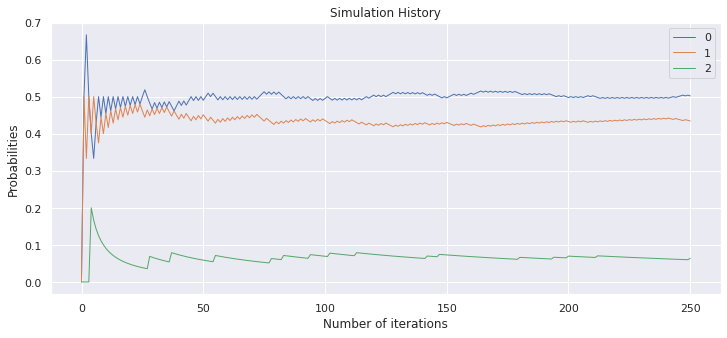

In [ ]:
from random import seed
from random import random
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})

P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

stateChangeHist= np.array([[0.0,  0.0,  0.0],
                          [0.0, 0.0,  0.0],
                          [0.0, 0.0,  0.0]])

state=np.array([[1.0, 0.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
seed(4)

# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
  r=np.random.uniform(0.0, 1.0)
  CS=np.cumsum(vmultinomial)
  CS=np.insert(CS,0,0)
  m=(np.where(CS<r))[0]
  nextState=m[len(m)-1]
  return nextState

iterations = 250

for x in range(iterations):
  currentRow=np.ma.masked_values((P[currentState]), 0.0)
  nextState=simulate_multinomial(currentRow)
  # Keep track of state changes
  stateChangeHist[currentState,nextState]+=1
  # Keep track of the state vector itself
  state=np.array([[0,0,0]])
  state[0,nextState]=1.0
  # Keep track of state history
  stateHist=np.append(stateHist,state,axis=0)
  currentState=nextState
  # calculate the actual distribution over the 3 states so far
  totals=np.sum(stateHist,axis=0)
  gt=np.sum(totals)
  distrib=totals/gt
  distrib=np.reshape(distrib,(1,3))
  distr_hist = np.append(distr_hist,distrib,axis=0)
print(distrib)
P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]

# Check estimated state transition probabilities based on history so far:
print(P_hat)
dfDistrHist = pd.DataFrame(distr_hist)

# Plot the distribution as the simulation progresses over time
dfDistrHist.plot(title="Simulation History")
plt.xlabel("Number of iterations")
plt.ylabel("Probabilities")
plt.show()

**Example 2: Toy Example to transition between sleep, run and eat**

[Source](https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial) and additionally check: https://setosa.io/ev/markov-chains/

In [ ]:
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]
transitionMatrix = pd.DataFrame(transitionMatrix, columns=['sleep', 'run', 'eat'])
transitionMatrix.insert(0, "state", ['sleep', 'run', 'eat'], True)
transitionMatrix = transitionMatrix.set_index('state')
transitionMatrix.index.name = None
transitionMatrix

,sleep,run,eat
sleep,0.2,0.6,0.2
run,0.1,0.6,0.3
eat,0.2,0.7,0.1


**The rows are the current state and the columns are the next state in the process!** So the first ror describes all the steps from state sleep to state run and eat.

* The state diagram has 3 possible states: sleep, run, icecream. So, the transition matrix will be 3 x 3 matrix. Notice, the arrows exiting a state always sums up to exactly 1, similarly the entries in each row in the transition matrix must add up to exactly 1 - representing probability distribution. In the transition matrix, the cells do the same job that the arrows do in the state diagram.

* With the example that you have seen, you can now answer questions like: "Starting from the state: sleep, what is the probability that Cj will be running (state: run) at the end of a sad 2-day duration?"

* Let's work this one out: In order to move from state: sleep to state: run, Cj must either stay on state: sleep the first move (or day), then move to state: run the next (second) move (0.2 ⋅
 0.6); or move to state: run the first day and then stay there the second (0.6 ⋅
 0.6) or she could transition to state: icecream on the first move and then to state: run in the second (0.2 ⋅ 0.7). So the probability: ((0.2 ⋅ 0.6) + (0.6 ⋅ 0.6) + (0.2 ⋅ 0.7)) = 0.62. So, we can now say that there is a 62% chance that Cj will move to state: run after two days of being sad, if she started out in the state: sleep.


Let's now define the states and their probability: the transition matrix. Remember, the matrix is going to be a 3 X 3 matrix since you have three states. Also, you will have to define the transition paths, you can do this using matrices as well.

In [ ]:
# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

Make sure the probabilities sum up to 1:

In [ ]:
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All correct, probabilities sum up to 1")

All correct, probabilities sum up to 1


Use the numpy.random.choice to generate a random sample from the set of transitions possible. While most of its arguments are self-explanatory, the p might not be. It is an optional argument that lets you enter the probability distribution for the sampling set, which is the transition matrix in this case.

In [ ]:
# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)

Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3


You get a random set of transitions possible along with the probability of it happening, starting from state: Sleep. Extend the program further to maybe iterate it for a couple of hundred times with the same starting state, you can then see the expected probability of ending at any particular state along with its probability. Let's rewrite the function activity_forecast and add a fresh set of loops to do this...

In [ ]:
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

The probability of starting at state:'Sleep' and ending at state:'Run'= 62.41%


How did we approximate towards the desired 62%? Note This is actually the "law of large numbers", which is a principle of probability that states that the frequencies of events with the same likelihood of occurrence even out, but only if there are enough trials or instances. In other words, as the number of experiments increases, the actual ratio of outcomes will converge on a theoretical or expected ratio of outcomes.

# **Markov Chain Monte Carlo (MCMC)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

https://towardsdatascience.com/introduction-to-mcmc-1c8e3ea88cc9

Various types of random walks are of interest, which can differ in several ways. The term itself most often refers to a special category of Markov chains or Markov processes, but many time-dependent processes are referred to as random walks, with a modifier indicating their specific properties. Random walks (Markov or not) can also take place on a variety of spaces: commonly studied ones include graphs, others on the integers or the real line, in the plane or higher-dimensional vector spaces, on curved surfaces or higher-dimensional Riemannian manifolds, and also on groups finite, finitely generated or Lie.

**Markov Chain**

* A Markov Chain is a process where the next state depends only on the current state. (A state in this context refers to the assignment of values to the parameters). 

* A Markov Chain is memoryless because only the current state matters and not how it arrived in that state. 

* The concept of a Markov Chain is that we do not need to know the entire history of a process to predict the next output, an approximation that works well in many real-world situations.

**Monte Carlo Simulation**

* Monte Carlo can be thought of as carrying out many experiments, each time changing the variables in a model and observing the response. 

* Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on **repeated random sampling to obtain numerical results**. The underlying concept is to use randomness to solve problems that might be deterministic in principle.

* Monte Carlo methods are useful for **simulating systems with many coupled degrees of freedom**, such as fluids, disordered materials, strongly coupled solids, and cellular structures (see cellular Potts model, interacting particle systems, McKean–Vlasov processes, kinetic models of gases). Other examples include **modeling phenomena with significant uncertainty in inputs** such as the calculation of risk in business

* By choosing random values, we can **explore a large portion of the parameter space**, the range of possible values for the variables. A parameter space for our problem using normal priors for the variables (more on this in a moment) is shown below.

* Clearly we cannot try every single point in these plots, but by randomly sampling from regions of higher probability (red) we can **create the most likely model for our problem**.

* Before the Monte Carlo method was developed, simulations tested a previously understood deterministic problem, and statistical sampling was used to estimate uncertainties in the simulations. Monte Carlo simulations invert this approach, **solving deterministic problems using probabilistic metaheuristics** (see [simulated annealing](https://en.m.wikipedia.org/wiki/Simulated_annealing))


<i>Simulated annealing (SA) is a probabilistic technique for approximating the global optimum of a given function. Specifically, it is a metaheuristic to **approximate global optimization in a large search space for an optimization problem**. It is often used when the search space is discrete (e.g., the traveling salesman problem). For problems where finding an approximate global optimum is more important than finding a precise local optimum in a fixed amount of time, simulated annealing may be preferable to alternatives such as **gradient descent**.</i>

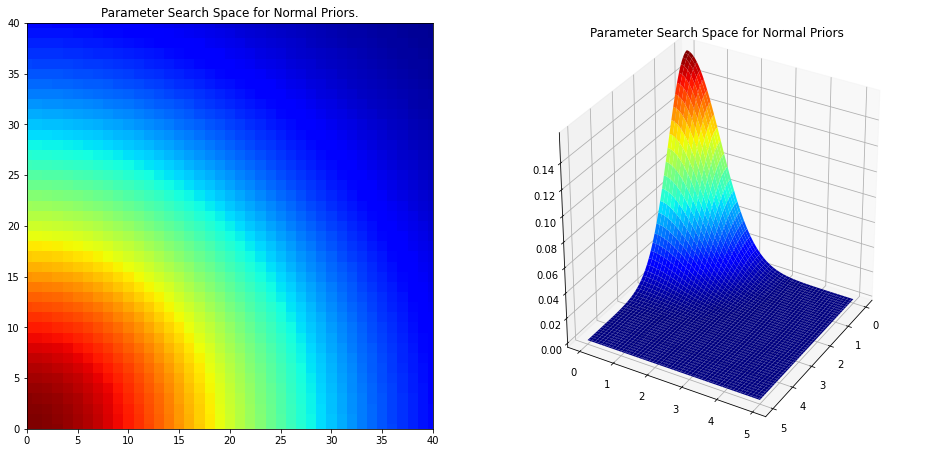

In [ ]:
import scipy.stats as stats
from IPython.core.pylabtools import figsize
figsize(16, 8)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
norm_x = stats.norm.pdf(x, loc=0, scale=1)
norm_y = stats.norm.pdf(y, loc=0, scale=1)
M = np.dot(norm_x[:, None], norm_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet)

plt.xlim(0, 40)
plt.ylim(0, 40)
plt.title("Parameter Search Space for Normal Priors.")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet)
ax.view_init(azim=390)
plt.title("Parameter Search Space for Normal Priors");

**Markov Chain Monte Carlo (MCMC)**

* Markov Chain Monte Carlo refers to a **class of methods** for sampling from a probability distribution in order to **construct the most likely distribution**. 

* We cannot directly calculate the (i.e. logistic) distribution, so instead we generate thousands of values — called samples — for the parameters of the function (alpha and beta) to **create an approximation of the distribution**. 

* The idea behind MCMC is that **as we generate more samples, our approximation gets closer and closer to the actual true distribution**.

* Markov Chain and Monte Carlo, MCMC is a method that repeatedly draws random values for the parameters of a distribution based on the current values. **Each sample of values is random, but the choices for the values are limited by the current state and the assumed prior distribution of the parameters**. 

* MCMC can be considered as a **random walk** that gradually converges to the true distribution.

* Monte Carlo methods can be used to solve any problem having a probabilistic interpretation. By the law of large numbers, integrals described by the expected value of some random variable can be approximated by taking the empirical mean (a.k.a. the sample mean) of independent samples of the variable. **When the probability distribution of the variable is parametrized, mathematicians often use a Markov chain Monte Carlo (MCMC) sampler**.

* The central idea is to design a judicious Markov chain model with a prescribed stationary probability distribution. That is, in the limit, the samples being generated by the MCMC method will be samples from the desired (target) distribution. By the ergodic theorem, the stationary distribution is approximated by the empirical measures of the random states of the MCMC sampler.

* In other problems, the objective is generating draws from a sequence of probability distributions satisfying a nonlinear evolution equation. These flows of probability distributions can always be interpreted as the distributions of the random states of a Markov process whose transition probabilities depend on the distributions of the current random states (see McKean–Vlasov processes, nonlinear filtering equation).

**Mean Field Particle Techniques**

* In other instances we are given a flow of probability distributions with an increasing level of sampling complexity (path spaces models with an increasing time horizon, Boltzmann–Gibbs measures associated with decreasing temperature parameters, and many others). These models can also be seen as the evolution of the law of the random states of a nonlinear Markov chain.

* A natural way to simulate these sophisticated nonlinear Markov processes is to sample multiple copies of the process, replacing in the evolution equation the unknown distributions of the random states by the sampled empirical measures. 

* In contrast with traditional Monte Carlo and MCMC methodologies these [mean field particle techniques](https://en.m.wikipedia.org/wiki/Mean_field_particle_methods) rely on sequential interacting samples. The terminology mean field reflects the fact that each of the samples (a.k.a. particles, individuals, walkers, agents, creatures, or phenotypes) interacts with the empirical measures of the process. 

* When the size of the system tends to infinity, these random empirical measures converge to the deterministic distribution of the random states of the nonlinear Markov chain, so that the statistical interaction between particles vanishes.

## **MCMC Algorithms**

**Metropolis Hastings**

In order to connect our observed data to the model, every time a set of random values are drawn, the algorithm evaluates them against the data. If they do not agree with the data (simplified!), the values are rejected and the model remains in the current state. If the random values are in agreement with the data, the values are assigned to the parameters and become the current state. This process continues for a specified number of steps, with the accuracy of the model improving with the number of steps.

1. Select an initial set of values for alpha and beta, the parameters of the (logistic) function.
2. Randomly assign new values to alpha and beta based on the current state.
3. Check if the new random values agree with the observations. If they do not, reject the values and return to the previous state. If they do, accept the values as the new current state.
4. Repeat steps 2 and 3 for the specified number of iterations.


## **Simulate MCMC**

https://github.com/WillKoehrsen/ai-projects/blob/master/markov_chain_monte_carlo/markov_chain_monte_carlo.ipynb

https://link.medium.com/BZoOFqWQr7